In [1]:
from IPython.display import Image


# Excel observations:

room_bed columns: 0 value is possible as there can be house with no bedroom. Max value is 33 and only one record exists for 33 so it can be an outlier.Based  on visualization its value should either be 3 or 4


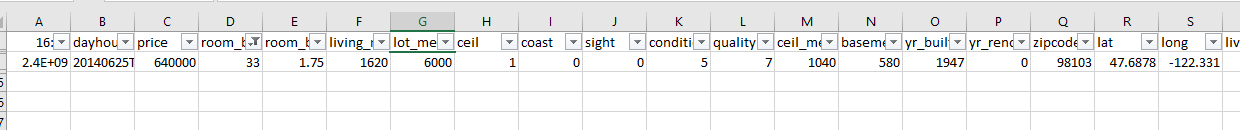

In [2]:
Image(filename='img1.png')


living_measure= ceil_measure+basement (we can drop off this 2 columns)


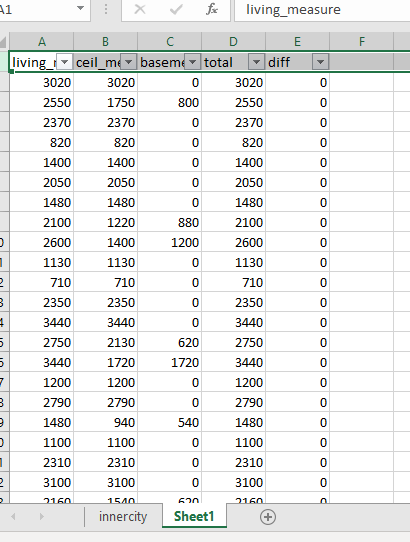

In [3]:
Image(filename='img2.png')

As per understanding and visual analysis, lot_measure value should be greater than living measure. There are cases were lot_measure value is very low compared to living_measure. This can be a case of outliers.

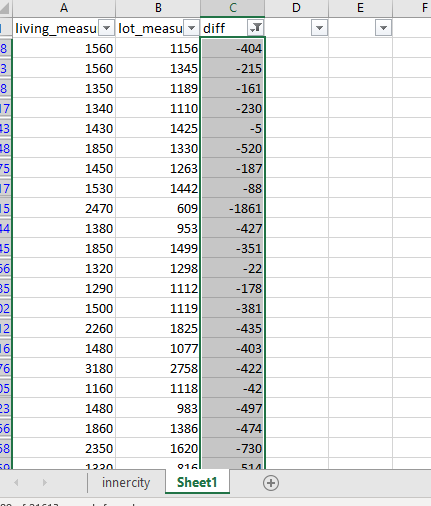

In [4]:
Image(filename='img3.png')

lattitude and longitude column values will help in no way for prediction and as per logical understanding zipcode is related to both this columns so we can proceed with using zipcode column and drop off lat and long columns.

total_area=living_measure+lot_area we can think of dropping total_area column if not highly corelated with price column.
Information present in total_area is being expressed by other 2 columns and they are important columns.

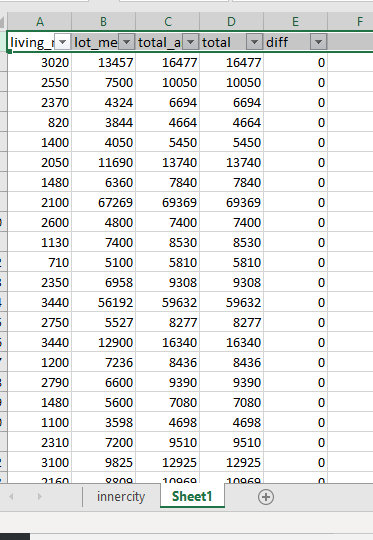

In [5]:
Image(filename='img4.png')

Below are categorical columns

1)coast(1,0)

2)condition(1-5)

3)sight(0-4)

4)quality(1-13)

5)furnished(1,0)

6)room_bath(0-8)

7)room_bed(0-33)


# EDA

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

from dateutil import relativedelta

from datetime import datetime
%matplotlib inline

#dealing with skewness
from scipy.stats import skew
import numpy as np
from scipy import stats

In [7]:
city_df=pd.read_csv('innercity.csv',parse_dates=[1])

In [8]:
city_df.head(200)

cid   dayhours    price  room_bed  room_bath  living_measure  \
0    3034200666 2014-11-07   808100         4       3.25            3020   
1    8731981640 2014-12-04   277500         4       2.50            2550   
2    5104530220 2015-04-20   404000         3       2.50            2370   
3    6145600285 2014-05-29   300000         2       1.00             820   
4    8924100111 2015-04-24   699000         2       1.50            1400   
5    5525400430 2014-07-15   585000         3       2.50            2050   
6    2419600075 2014-12-01   465000         3       1.75            1480   
7     114101161 2014-08-29   480000         3       1.50            2100   
8    7011201550 2014-07-07   780000         4       2.00            2600   
9    7203000640 2014-09-18   215000         4       1.00            1130   
10   7518503685 2014-10-09   402000         2       1.00             710   
11   7300400150 2014-10-27   299000         4       2.50            2350   
12   2215800050 2015-04-15   785000         4       2.50            3440   
13   7443000480 2015-05-07   865000         4       2.00            2750   
14   5072100095 2014-11-17   554000         5       2.50            3440   
15   1387301730 2015-02-02   361000         3       1.50            1200   
16   1310430130 2014-10-09   459000         4       2.75            2790   
17   3352400351 2014-11-21   200000         3       1.00            1480   
18   3678900110 2014-06-10   403000         2       1.00            1100   
19   2474400250 2014-06-30   327500         3       2.25            2310   
20   8820900029 2014-06-10   700000         5       2.75            3100   
21    263000050 2014-10-31   730000         3       2.50            2160   
22   9406500350 2014-12-29   207000         2       1.50            1068   
23   9533100145 2015-02-05   750000         3       1.00            1120   
24   5694500105 2014-12-04   595000         2       2.00            1510   
25   3291800710 2014-11-20   338000         4       3.00            2090   
26   9126100815 2014-12-17   500000         3       2.00            1560   
27   3416600800 2015-02-09   834000         4       2.50            2370   
28   7855000460 2014-10-07  1450000         3       2.75            3940   
29   6204410330 2014-10-20   432000         4       1.75            2410   
..          ...        ...      ...       ...        ...             ...   
170  4046601010 2014-10-23   399950         3       1.75            2450   
171  7852120120 2014-06-20   725000         3       3.50            3690   
172  8594400370 2015-02-05   299900         3       2.25            1560   
173  2771102158 2014-10-21   395000         3       3.50            1450   
174   985001015 2014-06-04   135000         1       1.00             790   
175  8901000585 2015-04-01   525000         4       1.75            1600   
176  4046601420 2014-12-30   340000         3       2.00            1570   
177  7683800200 2015-04-02   275000         2       1.50            1270   
178  3426049031 2014-06-17   870000         4       4.25            3010   
179   452001890 2015-04-15   730000         3       1.75            1650   
180  9828701745 2015-01-23   480000         2       1.00             710   
181  2769602135 2014-08-13   435000         3       2.00            1380   
182   629000605 2015-02-27  1400000         3       2.50            2910   
183  8651600110 2015-04-21   939000         4       2.25            2240   
184  2113700790 2015-03-12   435010         3       1.00            1270   
185  1231000520 2014-11-18   607010         4       2.50            2180   
186  7202270830 2014-06-25   608000         4       2.50            2690   
187  1446401290 2014-10-30   214950         3       1.00            1400   
188  7203101590 2015-01-08   305000         2       1.00            1290   
189  8682291840 2015-03-31   408000         2       2.00            1200   
190  3329510850 2015-03-06   286950         4       2.50    

There exists a package uszipcode where you can provide zipcode and get all details about that zipcode.
Here below i have extracted major city for each zip code.
There are total 70 unique zipcode and 24 unique major cities for the given dataset

zipcod_city_dicyionary={98177: 'Seattle', 98178: 'Seattle', 98052: 'Redmond', 98053: 'Redmond', 98055: 'Renton', 98056: 'Renton', 98058: 'Renton', 98059: 'Renton', 98188: 'Seattle', 98065: 'Snoqualmie', 98198: 'Seattle', 98199: 'Seattle', 98072: 'Woodinville', 98070: 'Vashon', 98074: 'Sammamish', 98075: 'Sammamish', 98077: 'Woodinville', 98092: 'Auburn', 98102: 'Seattle', 98103: 'Seattle', 98105: 'Seattle', 98106: 'Seattle', 98107: 'Seattle', 98108: 'Seattle', 98109: 'Seattle', 98112: 'Seattle', 98115: 'Seattle', 98116: 'Seattle', 98117: 'Seattle', 98118: 'Seattle', 98119: 'Seattle', 98122: 'Seattle', 98039: 'Medina', 98125: 'Seattle', 98126: 'Seattle', 98040: 'Mercer Island', 98001: 'Auburn', 98002: 'Auburn', 98003: 'Federal Way', 98004: 'Bellevue', 98133: 'Seattle', 98006: 'Bellevue', 98005: 'Bellevue', 98136: 'Seattle', 98008: 'Bellevue', 98010: 'Black Diamond', 98011: 'Bothell', 98007: 'Bellevue', 98014: 'Carnation', 98144: 'Seattle', 98146: 'Seattle', 98019: 'Duvall', 98148: 'Seattle', 98022: 'Enumclaw', 98023: 'Federal Way', 98024: 'Fall City', 98027: 'Issaquah', 98028: 'Kenmore', 98155: 'Seattle', 98029: 'Issaquah', 98031: 'Kent', 98032: 'Kent', 98033: 'Kirkland', 98034: 'Kirkland', 98030: 'Kent', 98038: 'Maple Valley', 98166: 'Seattle', 98168: 'Seattle', 98042: 'Kent', 98045: 'North Bend'}

In [9]:
#extract age of building in months eg 12.12 i.e 12 months 12 days passed
#age_since renovation is in years
#Assumption since we ony have year built we assumed the day and month for years built as 1
def extract_year(df):
    city_df['year_sold']=0
    city_df['age_sold']=0.0
    city_df['age_since_renovation']=0
    for index,rows in df.iterrows():
        date=rows['dayhours']
        yr=date.year
        yr_built=rows['yr_built']
        df.at[index,'year_sold']=yr
        r = relativedelta.relativedelta(date, datetime(yr_built,1,1))
        full_months = r.years * 12 + r.months + r.days * 0.01
        #df.at[index,'age_sold']=(yr-rows['yr_built'])
        df.at[index,'age_sold']=full_months
        if rows['yr_renovated']!=0:
            df.at[index,'age_since_renovation']=yr-rows['yr_renovated']
    return df




city_df=extract_year(city_df)
        
    

In [10]:
city_df.head(200)

cid   dayhours    price  room_bed  room_bath  living_measure  \
0    3034200666 2014-11-07   808100         4       3.25            3020   
1    8731981640 2014-12-04   277500         4       2.50            2550   
2    5104530220 2015-04-20   404000         3       2.50            2370   
3    6145600285 2014-05-29   300000         2       1.00             820   
4    8924100111 2015-04-24   699000         2       1.50            1400   
5    5525400430 2014-07-15   585000         3       2.50            2050   
6    2419600075 2014-12-01   465000         3       1.75            1480   
7     114101161 2014-08-29   480000         3       1.50            2100   
8    7011201550 2014-07-07   780000         4       2.00            2600   
9    7203000640 2014-09-18   215000         4       1.00            1130   
10   7518503685 2014-10-09   402000         2       1.00             710   
11   7300400150 2014-10-27   299000         4       2.50            2350   
12   2215800050 2015-04-15   785000         4       2.50            3440   
13   7443000480 2015-05-07   865000         4       2.00            2750   
14   5072100095 2014-11-17   554000         5       2.50            3440   
15   1387301730 2015-02-02   361000         3       1.50            1200   
16   1310430130 2014-10-09   459000         4       2.75            2790   
17   3352400351 2014-11-21   200000         3       1.00            1480   
18   3678900110 2014-06-10   403000         2       1.00            1100   
19   2474400250 2014-06-30   327500         3       2.25            2310   
20   8820900029 2014-06-10   700000         5       2.75            3100   
21    263000050 2014-10-31   730000         3       2.50            2160   
22   9406500350 2014-12-29   207000         2       1.50            1068   
23   9533100145 2015-02-05   750000         3       1.00            1120   
24   5694500105 2014-12-04   595000         2       2.00            1510   
25   3291800710 2014-11-20   338000         4       3.00            2090   
26   9126100815 2014-12-17   500000         3       2.00            1560   
27   3416600800 2015-02-09   834000         4       2.50            2370   
28   7855000460 2014-10-07  1450000         3       2.75            3940   
29   6204410330 2014-10-20   432000         4       1.75            2410   
..          ...        ...      ...       ...        ...             ...   
170  4046601010 2014-10-23   399950         3       1.75            2450   
171  7852120120 2014-06-20   725000         3       3.50            3690   
172  8594400370 2015-02-05   299900         3       2.25            1560   
173  2771102158 2014-10-21   395000         3       3.50            1450   
174   985001015 2014-06-04   135000         1       1.00             790   
175  8901000585 2015-04-01   525000         4       1.75            1600   
176  4046601420 2014-12-30   340000         3       2.00            1570   
177  7683800200 2015-04-02   275000         2       1.50            1270   
178  3426049031 2014-06-17   870000         4       4.25            3010   
179   452001890 2015-04-15   730000         3       1.75            1650   
180  9828701745 2015-01-23   480000         2       1.00             710   
181  2769602135 2014-08-13   435000         3       2.00            1380   
182   629000605 2015-02-27  1400000         3       2.50            2910   
183  8651600110 2015-04-21   939000         4       2.25            2240   
184  2113700790 2015-03-12   435010         3       1.00            1270   
185  1231000520 2014-11-18   607010         4       2.50            2180   
186  7202270830 2014-06-25   608000         4       2.50            2690   
187  1446401290 2014-10-30   214950         3       1.00            1400   
188  7203101590 2015-01-08   305000         2       1.00            1290   
189  8682291840 2015-03-31   408000         2       2.00            1200   
190  3329510850 2015-03-06   286950         4       2.50    

In [11]:
city_df[['yr_built','yr_renovated','year_sold','age_sold','dayhours','age_since_renovation']].head(200)

yr_built  yr_renovated  year_sold  age_sold   dayhours  \
0        1956             0       2014    706.06 2014-11-07   
1        1976             0       2014    467.03 2014-12-04   
2        2006             0       2015    111.19 2015-04-20   
3        1916             0       2014   1180.28 2014-05-29   
4        1954             0       2015    735.23 2015-04-24   
5        1989             0       2014    306.14 2014-07-15   
6        1954             0       2014    731.00 2014-12-01   
7        1949             0       2014    787.28 2014-08-29   
8        1953             0       2014    738.06 2014-07-07   
9        1969             0       2014    548.17 2014-09-18   
10       1905             0       2014   1317.08 2014-10-09   
11       1998             0       2014    201.26 2014-10-27   
12       1994             0       2015    255.14 2015-04-15   
13       1901          1987       2015   1372.06 2015-05-07   
14       1958             0       2014    682.16 2014-11-17   
15       1975             0       2015    481.01 2015-02-02   
16       2000             0       2014    177.08 2014-10-09   
17       1947             0       2014    814.20 2014-11-21   
18       1926             0       2014   1061.09 2014-06-10   
19       1990             0       2014    293.29 2014-06-30   
20       1950          1982       2014    773.09 2014-06-10   
21       2014             0       2014      9.30 2014-10-31   
22       1990             0       2014    299.28 2014-12-29   
23       1952             0       2015    757.04 2015-02-05   
24       1900             0       2014   1379.03 2014-12-04   
25       1986             0       2014    346.19 2014-11-20   
26       2014             0       2014     11.16 2014-12-17   
27       1928             0       2015   1045.08 2015-02-09   
28       1967             0       2014    573.06 2014-10-07   
29       1978             0       2014    441.19 2014-10-20   
..        ...           ...        ...       ...        ...   
170      1989             0       2014    309.22 2014-10-23   
171      2001             0       2014    161.19 2014-06-20   
172      1985             0       2015    361.04 2015-02-05   
173      2007             0       2014     93.20 2014-10-21   
174      1942             0       2014    869.03 2014-06-04   
175      1973             0       2015    507.00 2015-04-01   
176      2001             0       2014    167.29 2014-12-30   
177      1947             0       2015    819.01 2015-04-02   
178      1951          1996       2014    761.16 2014-06-17   
179      1900             0       2015   1383.14 2015-04-15   
180      1950             0       2015    780.22 2015-01-23   
181      1986             0       2014    343.12 2014-08-13   
182      1989             0       2015    313.26 2015-02-27   
183      1970             0       2015    543.20 2015-04-21   
184      1954             0       2015    734.11 2015-03-12   
185      2002             0       2014    154.17 2014-11-18   
186      2001             0       2014    161.24 2014-06-25   
187      1954             0       2014    729.29 2014-10-30   
188      2008             0       2015     84.07 2015-01-08   
189      2006             0       2015    110.30 2015-03-31   
190      1984             0       2015    374.05 2015-03-06   
191      1951             0       2014    760.12 2014-05-13   
192      1958             0       2015    687.00 2015-04-01   
193      1940             0       2015    904.05 2015-05-06   
194      1969          2008       2014    548.15 2014-09-16   
195      2001             0       2014    164.02 2014-09-03   
196      1981             0       2015    412.03 2015-05-04   
197      1997             0       2015    219.19 2015-04-20   
198      2003             0       2014    140.02 2014-09-03   
199      1984             0       2014    365.09 2014-06-10   

     age_since_renovation  
0                       0  
1                       0  
2             

In [12]:
city_df.cid.nunique()

21436

In [13]:
#drop cid columns as its unique for each row and have no contribution in predicting target columns
city_df.drop(columns=['cid'],inplace=True)

In [14]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
dayhours                21613 non-null datetime64[ns]
price                   21613 non-null int64
room_bed                21613 non-null int64
room_bath               21613 non-null float64
living_measure          21613 non-null int64
lot_measure             21613 non-null int64
ceil                    21613 non-null float64
coast                   21613 non-null int64
sight                   21613 non-null int64
condition               21613 non-null int64
quality                 21613 non-null int64
ceil_measure            21613 non-null int64
basement                21613 non-null int64
yr_built                21613 non-null int64
yr_renovated            21613 non-null int64
zipcode                 21613 non-null int64
lat                     21613 non-null float64
long                    21613 non-null float64
living_measure15        21613 non-null int64
lot_measure15      

In [15]:
#display statistics for first 10 columns for better visibility
city_df[city_df.columns.tolist()[0:10]].describe().transpose()

count           mean            std      min        25%  \
price           21613.0  540182.158793  367362.231718  75000.0  321950.00   
room_bed        21613.0       3.370842       0.930062      0.0       3.00   
room_bath       21613.0       2.114757       0.770163      0.0       1.75   
living_measure  21613.0    2079.899736     918.440897    290.0    1427.00   
lot_measure     21613.0   15106.967566   41420.511515    520.0    5040.00   
ceil            21613.0       1.494309       0.539989      1.0       1.00   
coast           21613.0       0.007542       0.086517      0.0       0.00   
sight           21613.0       0.234303       0.766318      0.0       0.00   
condition       21613.0       3.409430       0.650743      1.0       3.00   

                      50%       75%        max  
price           450000.00  645000.0  7700000.0  
room_bed             3.00       4.0       33.0  
room_bath            2.25       2.5        8.0  
living_measure    1910.00    2550.0    13540.0  
lot_measure       7618.00   10688.0  1651359.0  
ceil                 1.50       2.0        3.5  
coast                0.00       0.0        1.0  
sight                0.00       0.0        4.0  
condition            3.00       4.0        5.0

We observed skewness in room_bed,room_bath,living _measures,lot_measures.

For ceil,min value is 1 which states that each house has atleast one floor. Mean and median is almost same but we have long tail at right end


In [16]:
#display statistics for remaining columns for better visibility
city_df[city_df.columns.tolist()[10:]].describe().transpose()

count          mean           std         min  \
quality               21613.0      7.656873      1.175459      1.0000   
ceil_measure          21613.0   1788.390691    828.090978    290.0000   
basement              21613.0    291.509045    442.575043      0.0000   
yr_built              21613.0   1971.005136     29.373411   1900.0000   
yr_renovated          21613.0     84.402258    401.679240      0.0000   
zipcode               21613.0  98077.939805     53.505026  98001.0000   
lat                   21613.0     47.560053      0.138564     47.1559   
long                  21613.0   -122.213896      0.140828   -122.5190   
living_measure15      21613.0   1986.552492    685.391304    399.0000   
lot_measure15         21613.0  12768.455652  27304.179631    651.0000   
furnished             21613.0      0.196687      0.397503      0.0000   
total_area            21613.0  17186.867302  41589.081215   1423.0000   
year_sold             21613.0   2014.322954      0.467616   2014.0000   
age_sold              21613.0    525.535474    352.500199     -7.1200   
age_since_renovation  21613.0      0.779947      4.895330     -1.0000   

                            25%         50%        75%           max  
quality                   7.000      7.0000      8.000  1.300000e+01  
ceil_measure           1190.000   1560.0000   2210.000  9.410000e+03  
basement                  0.000      0.0000    560.000  4.820000e+03  
yr_built               1951.000   1975.0000   1997.000  2.015000e+03  
yr_renovated              0.000      0.0000      0.000  2.015000e+03  
zipcode               98033.000  98065.0000  98118.000  9.819900e+04  
lat                      47.471     47.5718     47.678  4.777760e+01  
long                   -122.328   -122.2300   -122.125 -1.213150e+02  
living_measure15       1490.000   1840.0000   2360.000  6.210000e+03  
lot_measure15          5100.000   7620.0000  10083.000  8.712000e+05  
furnished                 0.000      0.0000      0.000  1.000000e+00  
total_area             7035.000   9575.0000  13000.000  1.652659e+06  
year_sold              2014.000   2014.0000   2015.000  2.015000e+03  
age_sold                218.150    480.0600    760.220  1.384110e+03  
age_since_renovation      0.000      0.0000      0.000  8.000000e+01

We observed that quality,ceil_measure,basement,living_measure15,lot_measure15 and total_area have skewness in there distribution.

Basement column has long right tail. For yr_renovated column, all quantiles have 0 values which is doubtfull as in excel second minimum value is 1934. As per understanding if a flat is renovated, the price should be higher.

We calculated age at which the flat was sold by yrsold-yrbuilt formula. From above statistics min value is -1 i.e house was sold before it was built which is a potential outlier and needs to handle this.


In [17]:
    #print all records haveing age <0
city_df[city_df.age_sold<0][['age_sold','dayhours','yr_built','price','yr_renovated']]

age_sold   dayhours  yr_built   price  yr_renovated
1233      -5.00 2014-08-01      2015  455000             0
3109      -1.06 2014-11-25      2015  559000             0
10530     -7.12 2014-05-20      2015  490000             0
11734     -2.03 2014-10-29      2015  385195             0
11744     -5.01 2014-07-31      2015  230000             0
12509     -0.01 2014-12-31      2015  614285             0
13333     -6.06 2014-06-25      2015  597326             0
16360     -4.06 2014-08-26      2015  500000             0
17202     -6.14 2014-06-17      2015  350000             0
17763     -6.07 2014-06-24      2015  455000             0
20604     -5.23 2014-07-09      2015  595000             0
21273     -4.04 2014-08-28      2015  357000             0

In [18]:
#print all records haveing age ==  -1
city_df[city_df.age_sold<0]

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
1233  2014-08-01  455000         3       1.75            1320         1014   
3109  2014-11-25  559000         2       3.00            1650          960   
10530 2014-05-20  490000         5       3.50            4460         2975   
11734 2014-10-29  385195         1       1.00             710         6000   
11744 2014-07-31  230000         3       1.50            1040         1264   
12509 2014-12-31  614285         5       2.75            2730         6401   
13333 2014-06-25  597326         4       4.00            3570         8250   
16360 2014-08-26  500000         2       2.25            1570         1269   
17202 2014-06-17  350000         3       2.00            1380         3600   
17763 2014-06-24  455000         2       1.50            1200         1259   
20604 2014-07-09  595000         4       3.25            3730         4560   
21273 2014-08-28  357000         5       2.50            2990         9240   

       ceil  coast  sight  condition          ...           zipcode      lat  \
1233    3.0      0      0          3          ...             98122  47.6047   
3109    3.0      0      0          3          ...             98103  47.6611   
10530   3.0      0      2          3          ...             98119  47.6313   
11734   1.5      0      0          3          ...             98144  47.5756   
11744   2.0      0      0          3          ...             98144  47.5951   
12509   2.0      0      0          3          ...             98072  47.7685   
13333   2.0      0      0          3          ...             98040  47.5784   
16360   2.0      0      0          3          ...             98199  47.6514   
17202   3.0      0      0          3          ...             98122  47.6074   
17763   2.0      0      0          3          ...             98144  47.6001   
20604   2.0      0      0          3          ...             98103  47.6725   
21273   2.0      0      0          3          ...             98133  47.7384   

          long  living_measure15  lot_measure15  furnished  total_area  \
1233  -122.305              1380           1495          1        2334   
3109  -122.346              1650           3000          0        2610   
10530 -122.370              2490           4231          1        7435   
11734 -122.316              1440           4800          0        6710   
11744 -122.301              1350           3000          1        2304   
12509 -122.160              2520           6126          0        9131   
13333 -122.226              2230          10000          1       11820   
16360 -122.385              1570           6000          1        2839   
17202 -122.305              1480           3600          0        4980   
17763 -122.298              1320           1852          0        2459   
20604 -122.330              1800           4560          1        8290   
21273 -122.348              1970          18110          0       12230   

       year_sold  age_sold  age_since_renovation  
1233        2014     -5.00                     0  
3109        2014     -1.06                     0  
10530       2014     -7.12                     0  
11734       2014     -2.03                     0  
11744       2014     -5.01                     0  
12509       2014     -0.01                     0  
13333       2014     -6.06                     0  
16360       2014     -4.06                     0  
17202       2014     -6.14                     0  
17763       2014     -6.07                     0  
20604       2014     -5.23                     0  
21273       2014     -4.04                     0  

[12 rows x 25 columns]

    There are 12 records with age_sold as -1 which indicates the presence of outliers in yr_built column. There can be cases were people may not remember year built. We can either drop this 12 records or we can predict the year built by looking at the price range.

In [19]:
#print all records haveing age ==  0
city_df[city_df.age_sold==0][['age_sold','dayhours','yr_built','price','yr_renovated']].shape

(0, 5)

No records with age sold as 0

In [20]:
#print all records haveing age_since_renovation ==  -1
city_df[city_df.age_since_renovation==-1][['age_since_renovation','dayhours','yr_built','price','yr_renovated']]

age_since_renovation   dayhours  yr_built   price  yr_renovated
5304                     -1 2014-10-06      1955  825000          2015
6178                     -1 2014-05-22      1923  850000          2015
16342                    -1 2014-10-28      1940  285000          2015
16497                    -1 2014-07-01      1945  476000          2015
19338                    -1 2014-07-28      1922  585000          2015
19409                    -1 2014-06-06      1956  805000          2015

It can be a case that after house is sold, it got renovated so we can proceed with this records

In [21]:
#lets take copy of dataframe before preforming operations on columns
city_new_df=city_df.copy(deep=True)

In [22]:
city_new_df.shape

(21613, 25)

In [23]:
city_new_df[city_new_df.room_bed==33]

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
750 2014-06-25  640000        33       1.75            1620         6000   

     ceil  coast  sight  condition          ...           zipcode      lat  \
750   1.0      0      0          5          ...             98103  47.6878   

        long  living_measure15  lot_measure15  furnished  total_area  \
750 -122.331              1330           4700          0        7620   

     year_sold  age_sold  age_since_renovation  
750       2014    809.24                     0  

[1 rows x 25 columns]

In [24]:
#drop record with bedroom as 33 , age sold is <0
city_new_df.drop([ 750,1233,  3109, 10530, 11734, 11744, 12509, 13333, 16360, 17202,
            17763, 20604, 21273],inplace=True)
city_new_df.shape

(21600, 25)

We can drop of think of dropping year built and year sold column as we have derived new column age_sold.
Also we can drop lat, long column as zipcode will give the same info.
Lets first build pairplot using this columns and check how the relationship with the target column.

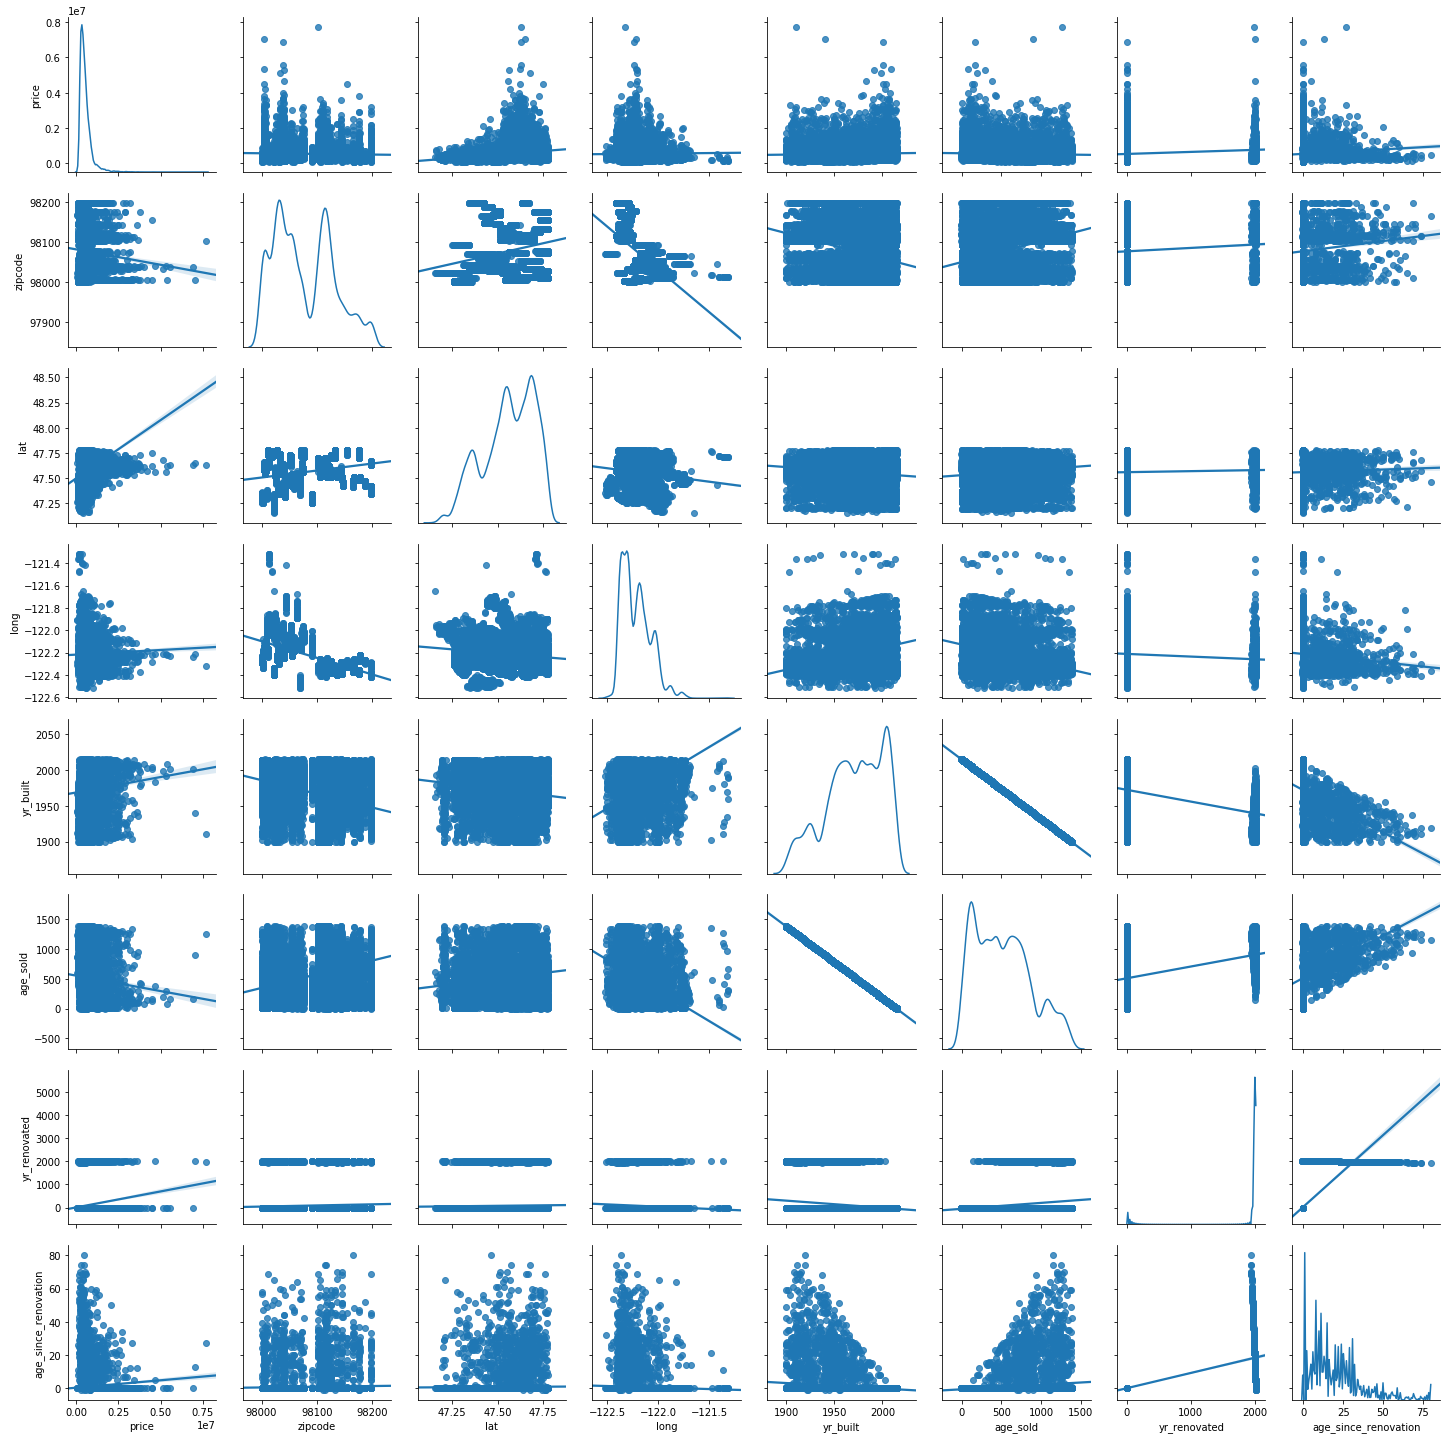

In [25]:
sns.pairplot(city_df,diag_kind='kde',vars=['price','zipcode','lat','long','yr_built','age_sold','yr_renovated','age_since_renovation'],kind='reg')

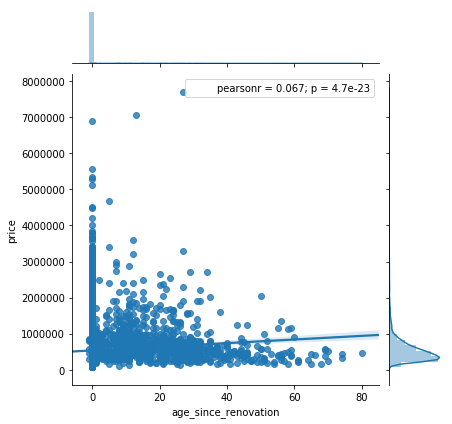

In [26]:
sns.jointplot('age_since_renovation','price',data=city_df,kind='reg')

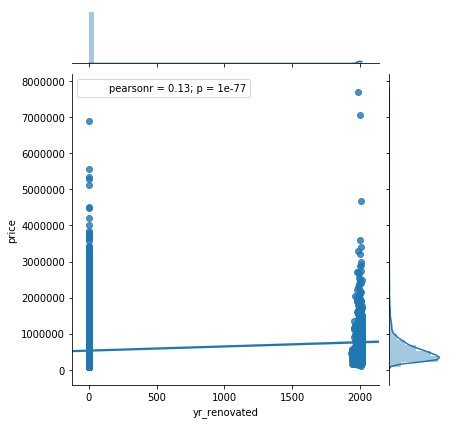

In [27]:
sns.jointplot('yr_renovated','price',data=city_df,kind='reg')

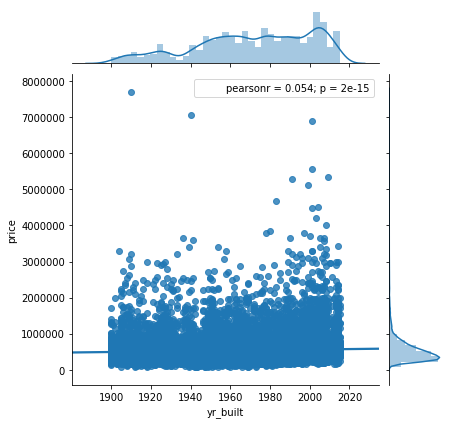

In [28]:
sns.jointplot('yr_built','price',data=city_df,kind='reg')

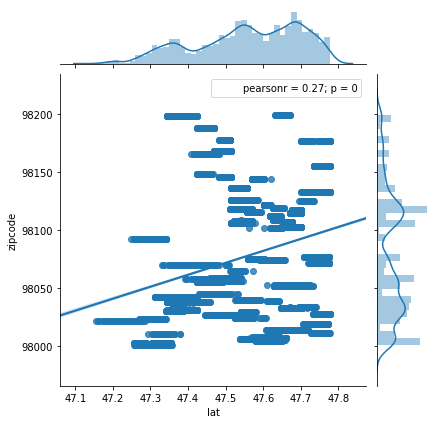

In [29]:
sns.jointplot('lat','zipcode',data=city_df,kind='reg')

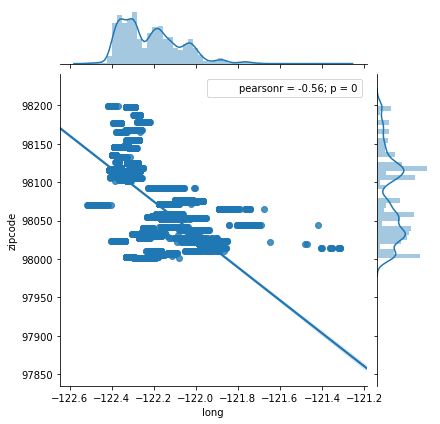

In [30]:
sns.jointplot('long','zipcode',data=city_df,kind='reg')

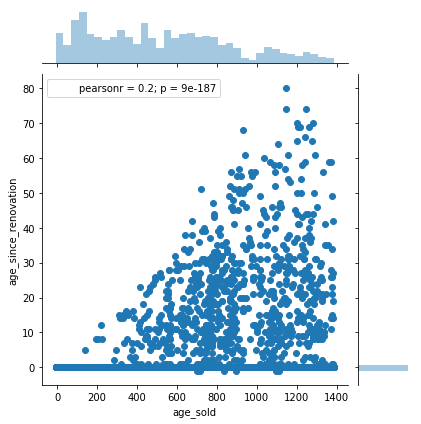

In [31]:
sns.jointplot(y='age_since_renovation',x='age_sold',data=city_df)

We can see that none of the column is linearly corelated with the target column. The distribution is almost spherical.
From above columns, we can see that there exists curvilinear relationship between lang,lat and zipcode column. we can drop lat and long and keep only zipcode column as we will be converting zipcode to city in further processing of data.
We constructed age sold column which seems to be more meaningfull than year built. We can drop yr_built and yearsold column and just retain age_sold column.

From yr_renovated and yr_sold column we constructed new column which gives age of house sold since renovation.
From the above joint plot we can see that if the diff between yr_renovated and yr_sold increases, price decreases.
Hence we can drpo yr_renovated column.

In [32]:
city_new_df.columns

Index(['dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'year_sold', 'age_sold', 'age_since_renovation'],
      dtype='object')

In [33]:
#remove the columns from list
city_new_df.drop(['lat','long','yr_built','dayhours','year_sold','yr_renovated'],axis=1,inplace=True)


In [34]:
city_new_df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'zipcode', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'age_sold', 'age_since_renovation'],
      dtype='object')

In [35]:
#for total area columns

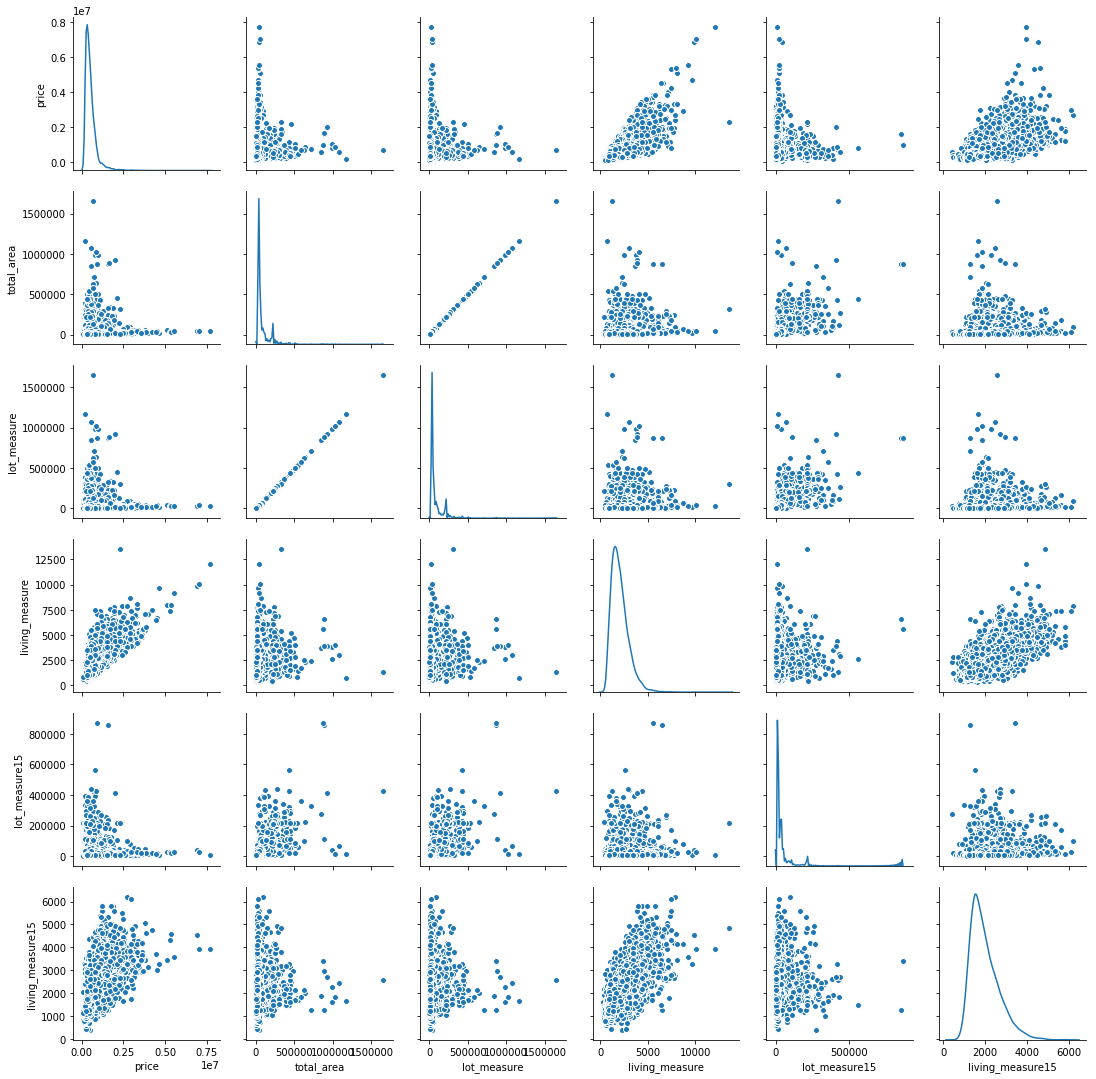

In [36]:
sns.pairplot(city_new_df,diag_kind='kde',vars=['price','total_area','lot_measure','living_measure','lot_measure15','living_measure15'])

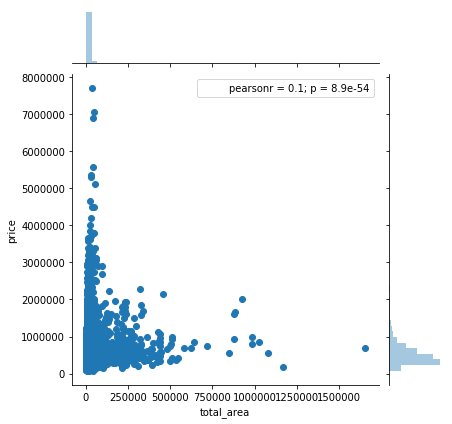

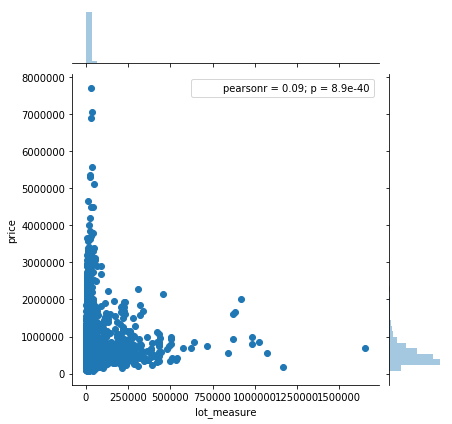

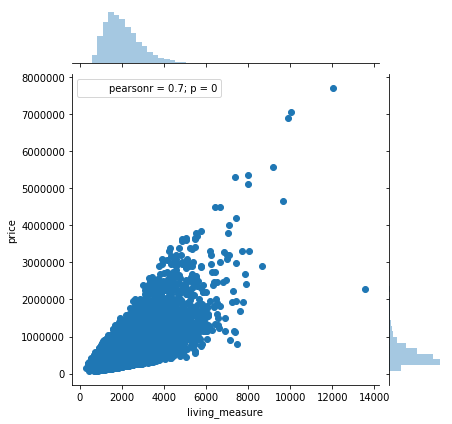

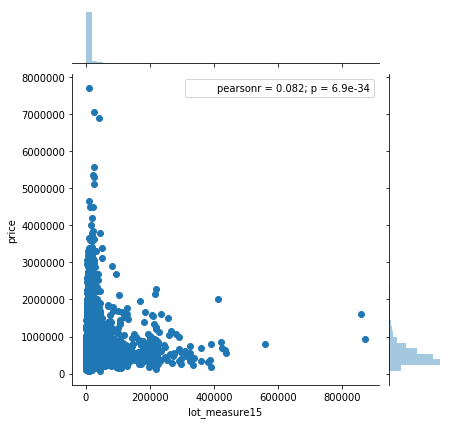

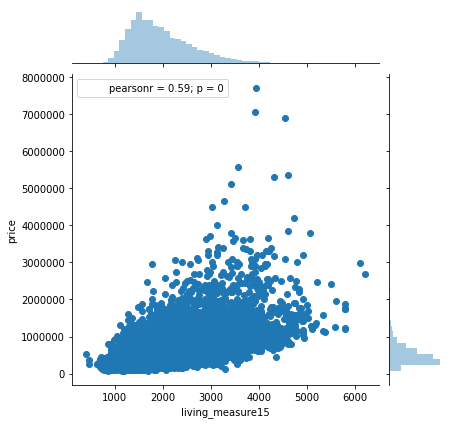

In [37]:
#lets check the scatter plot for area columns

area_cols=['total_area','lot_measure','living_measure','lot_measure15','living_measure15']
for i in range(0,len(area_cols),2):
    if len(area_cols) > i+1:
        sns.jointplot(city_new_df[area_cols[i]],city_new_df['price'])            
        sns.jointplot(city_new_df[area_cols[i+1]],city_new_df['price'])

    else:
        sns.jointplot(city_new_df[area_cols[i]],city_new_df['price'])
        
    


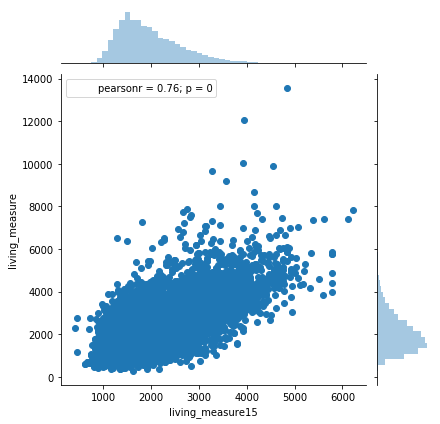

In [38]:
sns.jointplot(x='living_measure15',y='living_measure',data=city_new_df)

From the above graphs we can infer that even though total area=living measure+ lot measure, its not justifyable to delete the 2 columns and keep only total_area column.

Instead we can delete total measure column and keep remaining 2 columns i.e living measure(which is highly corelated with price column) and lot_measure.

lot_measure and total_measure columns are linearly corelated.

For lot_measure15 and living_measure15 we can think of considering only those 2 columnsinstead of living_measure and lot_measure  as its the latest area of house after some renovations.But if we drop living_measure or lot_measure we may face loss of some information.


In [39]:
#drop total_measure column
city_new_df.drop(labels=['total_area'],axis=1,inplace=True)

In [40]:
city_new_df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'zipcode', 'living_measure15', 'lot_measure15', 'furnished',
       'age_sold', 'age_since_renovation'],
      dtype='object')

In [41]:
#lets separate categorical, numerical and target column and proceed with visualization
categorical_cols=['coast','condition','sight','quality','furnished','ceil','room_bed','room_bath']
numerical_cols=[cols for cols in city_new_df.columns if cols not in categorical_cols]
numerical_cols.remove('price')
target_col='price'

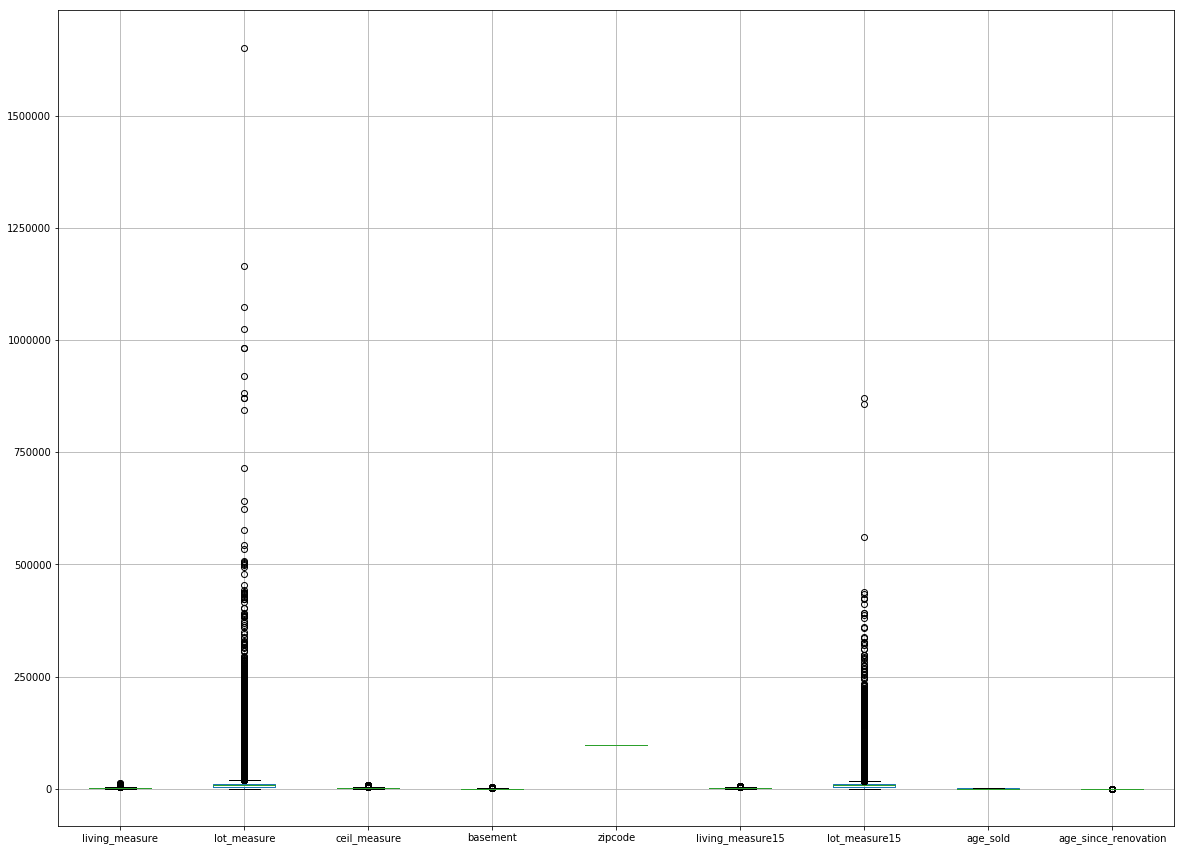

In [42]:
#As we can see from the below boxplot that there are outliers in almost all the columns.
city_new_df[numerical_cols].boxplot(figsize=(20,15))

From above boxplot we can see that lot_measure has more outliers than lot_measure15. Lets count the outlier present in the numerical columns

In [43]:
#return total number of outliers in a given column
def return_total_numberof_outliers(column,df_temp):
    q1 = df_temp[column].quantile(0.25) # upper quartile  } Note: The fuction is .quantile() with 'n'
    q3 =df_temp[column].quantile(0.75) # lower quartile  }       not .quartile() with 'r'
    outlier_lower_limit = q1 - 1.5*(q3 - q1)
    outlier_upper_limit = q3 + 1.5*(q3 - q1)
    value=df_temp[column]
    lower_limit_outliers = value[value < outlier_lower_limit].count()
    upper_limit_outliers = value[value > outlier_upper_limit].count()
    print("Outliers for {}:, upper limit is {}, lower limit is {} and total is:{}:".format(column,upper_limit_outliers,lower_limit_outliers,upper_limit_outliers+lower_limit_outliers))


In [44]:
#print number of outlier for all the columns.
#Only age column has comparatively much more number of outliers. Need to remove the outliers
for column in numerical_cols:
    return_total_numberof_outliers(column,city_new_df)

Outliers for living_measure:, upper limit is 571, lower limit is 0 and total is:571:
Outliers for lot_measure:, upper limit is 2422, lower limit is 0 and total is:2422:
Outliers for ceil_measure:, upper limit is 611, lower limit is 0 and total is:611:
Outliers for basement:, upper limit is 496, lower limit is 0 and total is:496:
Outliers for zipcode:, upper limit is 0, lower limit is 0 and total is:0:
Outliers for living_measure15:, upper limit is 544, lower limit is 0 and total is:544:
Outliers for lot_measure15:, upper limit is 2192, lower limit is 0 and total is:2192:
Outliers for age_sold:, upper limit is 0, lower limit is 0 and total is:0:
Outliers for age_since_renovation:, upper limit is 822, lower limit is 6 and total is:828:


let's remove the outliers present in numerical columnss

We verified that of we remove outliers present +/- 1.5*IQR from Q1 or Q3 then number of records goes down to approx 17500, which is 40% loss of data. Also relationship of independent attributes with target decreases significantly.

Let's remove outliers which are present below q1- 1.5* (0.95-0.05) and above q3+1.5*(0.95-0.05) quantiles.
Here q1=0.05 and q3 is 0.95
And treat remaining outliers with mean/median

In [45]:
city_new_wo_outlier_df=city_new_df.copy(deep=True)

In [46]:
#copy numerical list of columns
outlier_cols=numerical_cols.copy()

In [47]:
numerical_cols

['living_measure',
 'lot_measure',
 'ceil_measure',
 'basement',
 'zipcode',
 'living_measure15',
 'lot_measure15',
 'age_sold',
 'age_since_renovation']

In [48]:
#remove the below columns.
outlier_cols.remove('basement')
outlier_cols.remove('zipcode')
outlier_cols.remove('age_since_renovation')


In [49]:
outlier_cols

['living_measure',
 'lot_measure',
 'ceil_measure',
 'living_measure15',
 'lot_measure15',
 'age_sold']

In [50]:
#Calculate 0.05 and 0.95 quantiles
Q1=city_new_wo_outlier_df[outlier_cols].quantile(0.05)
Q3=city_new_wo_outlier_df[outlier_cols].quantile(0.95)
IQR=Q3-Q1
print(IQR)

living_measure       2820.0000
lot_measure         41546.4000
ceil_measure         2550.0000
living_measure15     2160.0000
lot_measure15       35070.7000
age_sold             1146.1025
dtype: float64


In [51]:
#Generate new dataframe without outliers.
city_new_wo_outlier_df=city_new_wo_outlier_df[~((city_new_wo_outlier_df < (Q1 - 1.5 * IQR)) |(city_new_wo_outlier_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [52]:
#shape of dataframe after removal of outlier
print('shape of dataframe without outliers:{}'.format(city_new_wo_outlier_df.shape))
print('shape of original dataframe:{}'.format(city_new_df.shape))

shape of dataframe without outliers:(21045, 18)
shape of original dataframe:(21600, 18)


In [54]:
city_new_wo_outlier_df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'zipcode', 'living_measure15', 'lot_measure15', 'furnished',
       'age_sold', 'age_since_renovation'],
      dtype='object')

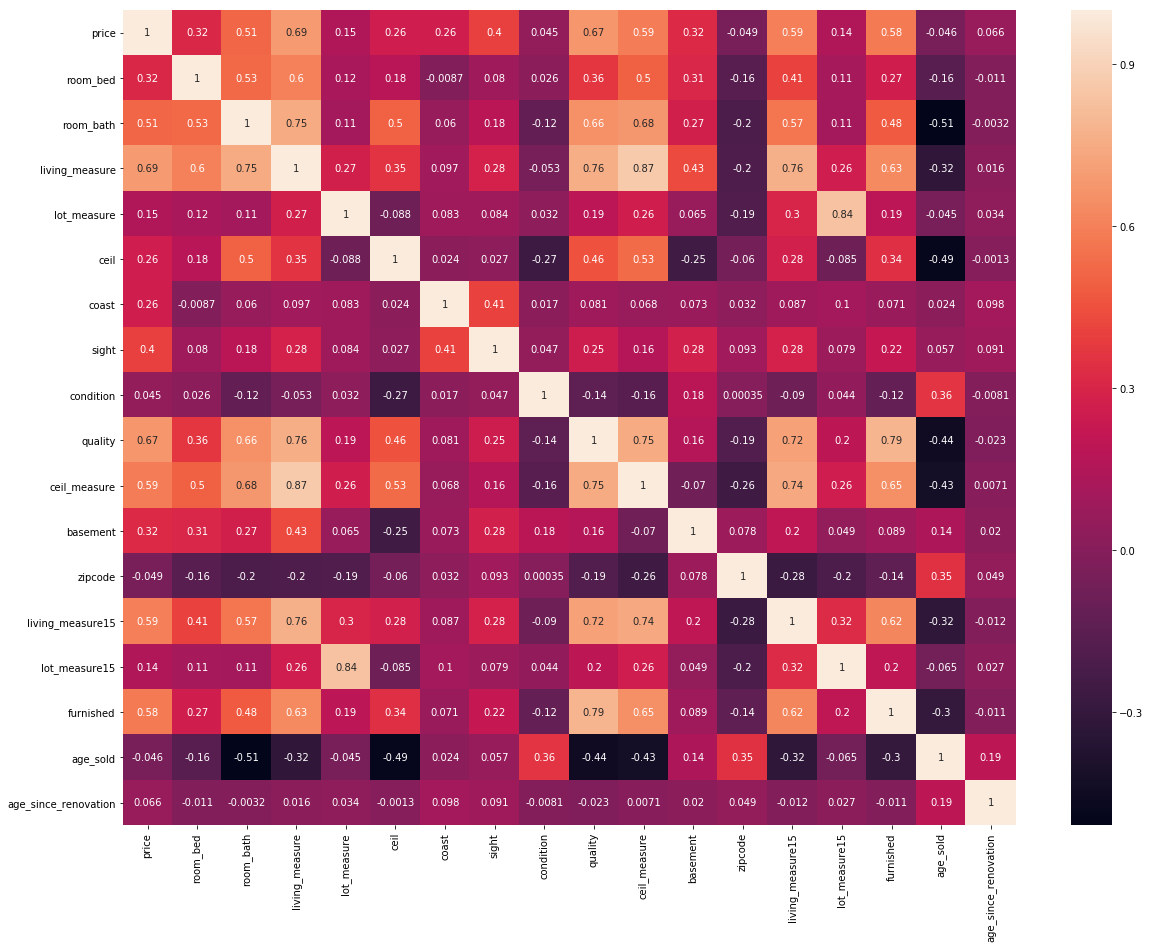

In [55]:
#lets check corelation values for new dataframe
corelation=city_new_wo_outlier_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corelation,annot=True)
plt.show()

In [56]:
#variables having corelation greater than 0.3 or less than 0.3 with target
corelation[(corelation.price > 0.3) | (corelation.price<-0.3)]['price']

price               1.000000
room_bed            0.315037
room_bath           0.511525
living_measure      0.691348
sight               0.404463
quality             0.670651
ceil_measure        0.590455
basement            0.318295
living_measure15    0.593682
furnished           0.576532
Name: price, dtype: float64

In [57]:
#Let's check number of outliers for new dataframe from which we removed outliers
print('Number of outliers in new dataframe:')
for column in numerical_cols:
    return_total_numberof_outliers(column,city_new_wo_outlier_df)

Number of outliers in new dataframe:
Outliers for living_measure:, upper limit is 538, lower limit is 0 and total is:538:
Outliers for lot_measure:, upper limit is 2014, lower limit is 0 and total is:2014:
Outliers for ceil_measure:, upper limit is 604, lower limit is 0 and total is:604:
Outliers for basement:, upper limit is 467, lower limit is 0 and total is:467:
Outliers for zipcode:, upper limit is 0, lower limit is 0 and total is:0:
Outliers for living_measure15:, upper limit is 504, lower limit is 0 and total is:504:
Outliers for lot_measure15:, upper limit is 1729, lower limit is 0 and total is:1729:
Outliers for age_sold:, upper limit is 0, lower limit is 0 and total is:0:
Outliers for age_since_renovation:, upper limit is 795, lower limit is 6 and total is:801:


In [58]:
#Let's check number of outliers for originalk dataframe
print('Number of outliers in original dataframe:')
for column in numerical_cols:
    return_total_numberof_outliers(column,city_new_df)

Number of outliers in original dataframe:
Outliers for living_measure:, upper limit is 571, lower limit is 0 and total is:571:
Outliers for lot_measure:, upper limit is 2422, lower limit is 0 and total is:2422:
Outliers for ceil_measure:, upper limit is 611, lower limit is 0 and total is:611:
Outliers for basement:, upper limit is 496, lower limit is 0 and total is:496:
Outliers for zipcode:, upper limit is 0, lower limit is 0 and total is:0:
Outliers for living_measure15:, upper limit is 544, lower limit is 0 and total is:544:
Outliers for lot_measure15:, upper limit is 2192, lower limit is 0 and total is:2192:
Outliers for age_sold:, upper limit is 0, lower limit is 0 and total is:0:
Outliers for age_since_renovation:, upper limit is 822, lower limit is 6 and total is:828:


We can see that even after removing outliers from original dataframe, the number of outliers in the new dataframe decreasedfor columns present in outliers columns.

Now let's try to treat the outliers using median.
We can replace outliers with median as replacing it with mean will be unreliable.

As we can see there are outliers present i the numerical columns  above q3+1.5*IQR
Let's calculate number of outliers present above q3+1.5*IQR and depending on the range and count we can decide the strategy to replace outliers

In [59]:
city_new_outlier_replaced_df=city_new_wo_outlier_df.copy(deep=True)


In [60]:
   
def replace_outliers_with_median(temp_df,columns):
    for col in columns:
            q1=temp_df[col].quantile(0.25)
            q3=temp_df[col].quantile(0.75)
            iqr=q3-q1
            outlier_lower_limit = q1 - 1.5*iqr
            outlier_upper_limit = q3 + 1.5*iqr
            value=temp_df[col]
            lower_limit_outliers = value[value < outlier_lower_limit].count()
            upper_limit_outliers = value[value > outlier_upper_limit].count()
            median=temp_df[col].median()
            if (lower_limit_outliers+upper_limit_outliers)>0:
                upperindex=list(value[value > outlier_upper_limit].index)
                lowerindex=list(value[value < outlier_lower_limit].index)
                t_index=upperindex+lowerindex
                temp_df.at[t_index,col]=median
    return temp_df

In [61]:
#city_new_outlier_replaced_df=replace_outliers_with_median(city_new_wo_outlier_df,numerical_cols)
city_new_outlier_replaced_df=replace_outliers_with_median(city_new_outlier_replaced_df,outlier_cols)

In [62]:
#Let's check number of outliers for originalk dataframe
print('Number of outliers in original dataframe:')
for col in numerical_cols:
    return_total_numberof_outliers(col,city_new_wo_outlier_df)

Number of outliers in original dataframe:
Outliers for living_measure:, upper limit is 538, lower limit is 0 and total is:538:
Outliers for lot_measure:, upper limit is 2014, lower limit is 0 and total is:2014:
Outliers for ceil_measure:, upper limit is 604, lower limit is 0 and total is:604:
Outliers for basement:, upper limit is 467, lower limit is 0 and total is:467:
Outliers for zipcode:, upper limit is 0, lower limit is 0 and total is:0:
Outliers for living_measure15:, upper limit is 504, lower limit is 0 and total is:504:
Outliers for lot_measure15:, upper limit is 1729, lower limit is 0 and total is:1729:
Outliers for age_sold:, upper limit is 0, lower limit is 0 and total is:0:
Outliers for age_since_renovation:, upper limit is 795, lower limit is 6 and total is:801:


In [63]:
#Let's check number of outliers for replaced dataframe
print('Number of outliers in replaced dataframe:')
for col in numerical_cols:
    return_total_numberof_outliers(col,city_new_outlier_replaced_df)

Number of outliers in replaced dataframe:
Outliers for living_measure:, upper limit is 176, lower limit is 0 and total is:176:
Outliers for lot_measure:, upper limit is 678, lower limit is 0 and total is:678:
Outliers for ceil_measure:, upper limit is 268, lower limit is 0 and total is:268:
Outliers for basement:, upper limit is 467, lower limit is 0 and total is:467:
Outliers for zipcode:, upper limit is 0, lower limit is 0 and total is:0:
Outliers for living_measure15:, upper limit is 207, lower limit is 0 and total is:207:
Outliers for lot_measure15:, upper limit is 518, lower limit is 0 and total is:518:
Outliers for age_sold:, upper limit is 0, lower limit is 0 and total is:0:
Outliers for age_since_renovation:, upper limit is 795, lower limit is 6 and total is:801:


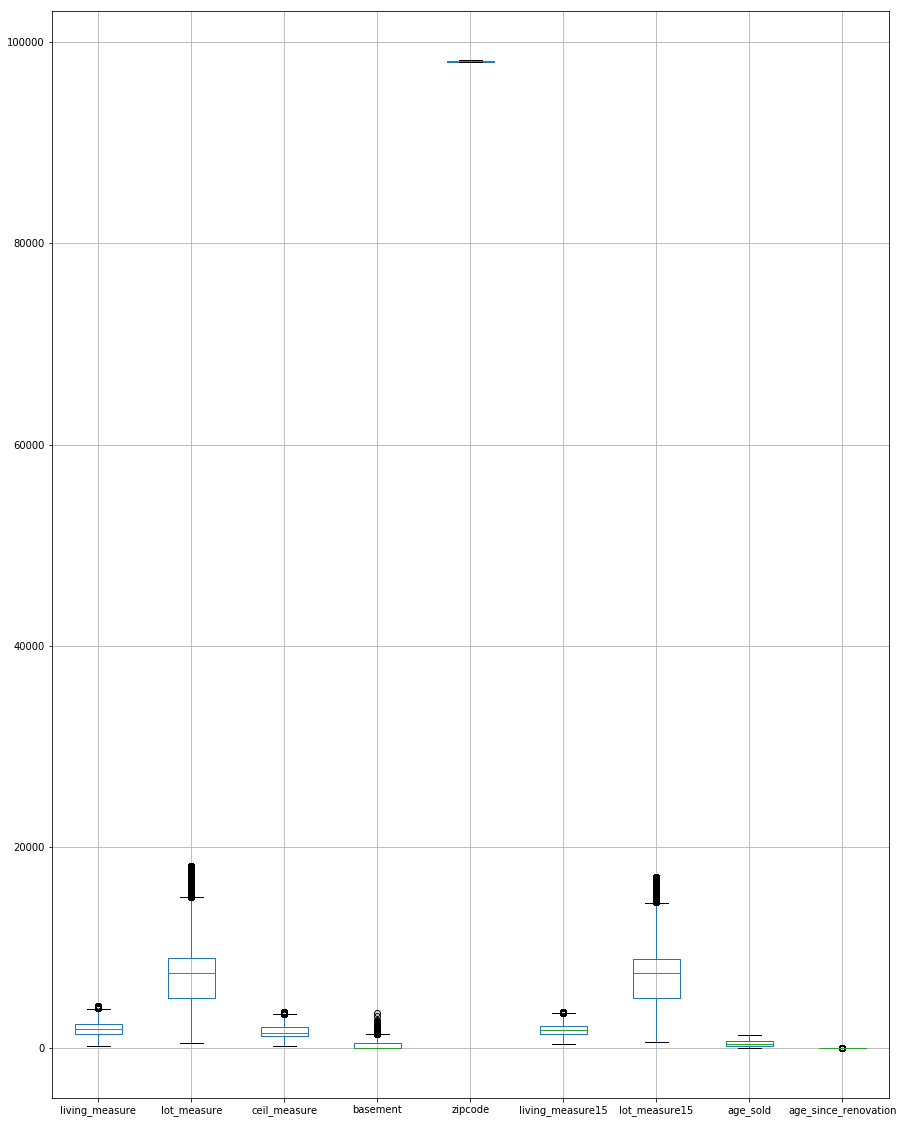

In [64]:
#Lets  check box plot of numerical columns with price for newly outlier replaced dataframe
city_new_outlier_replaced_df[numerical_cols].boxplot(figsize=(15,20))

We can see that the number of outliers reduced drastically for outlier columns.

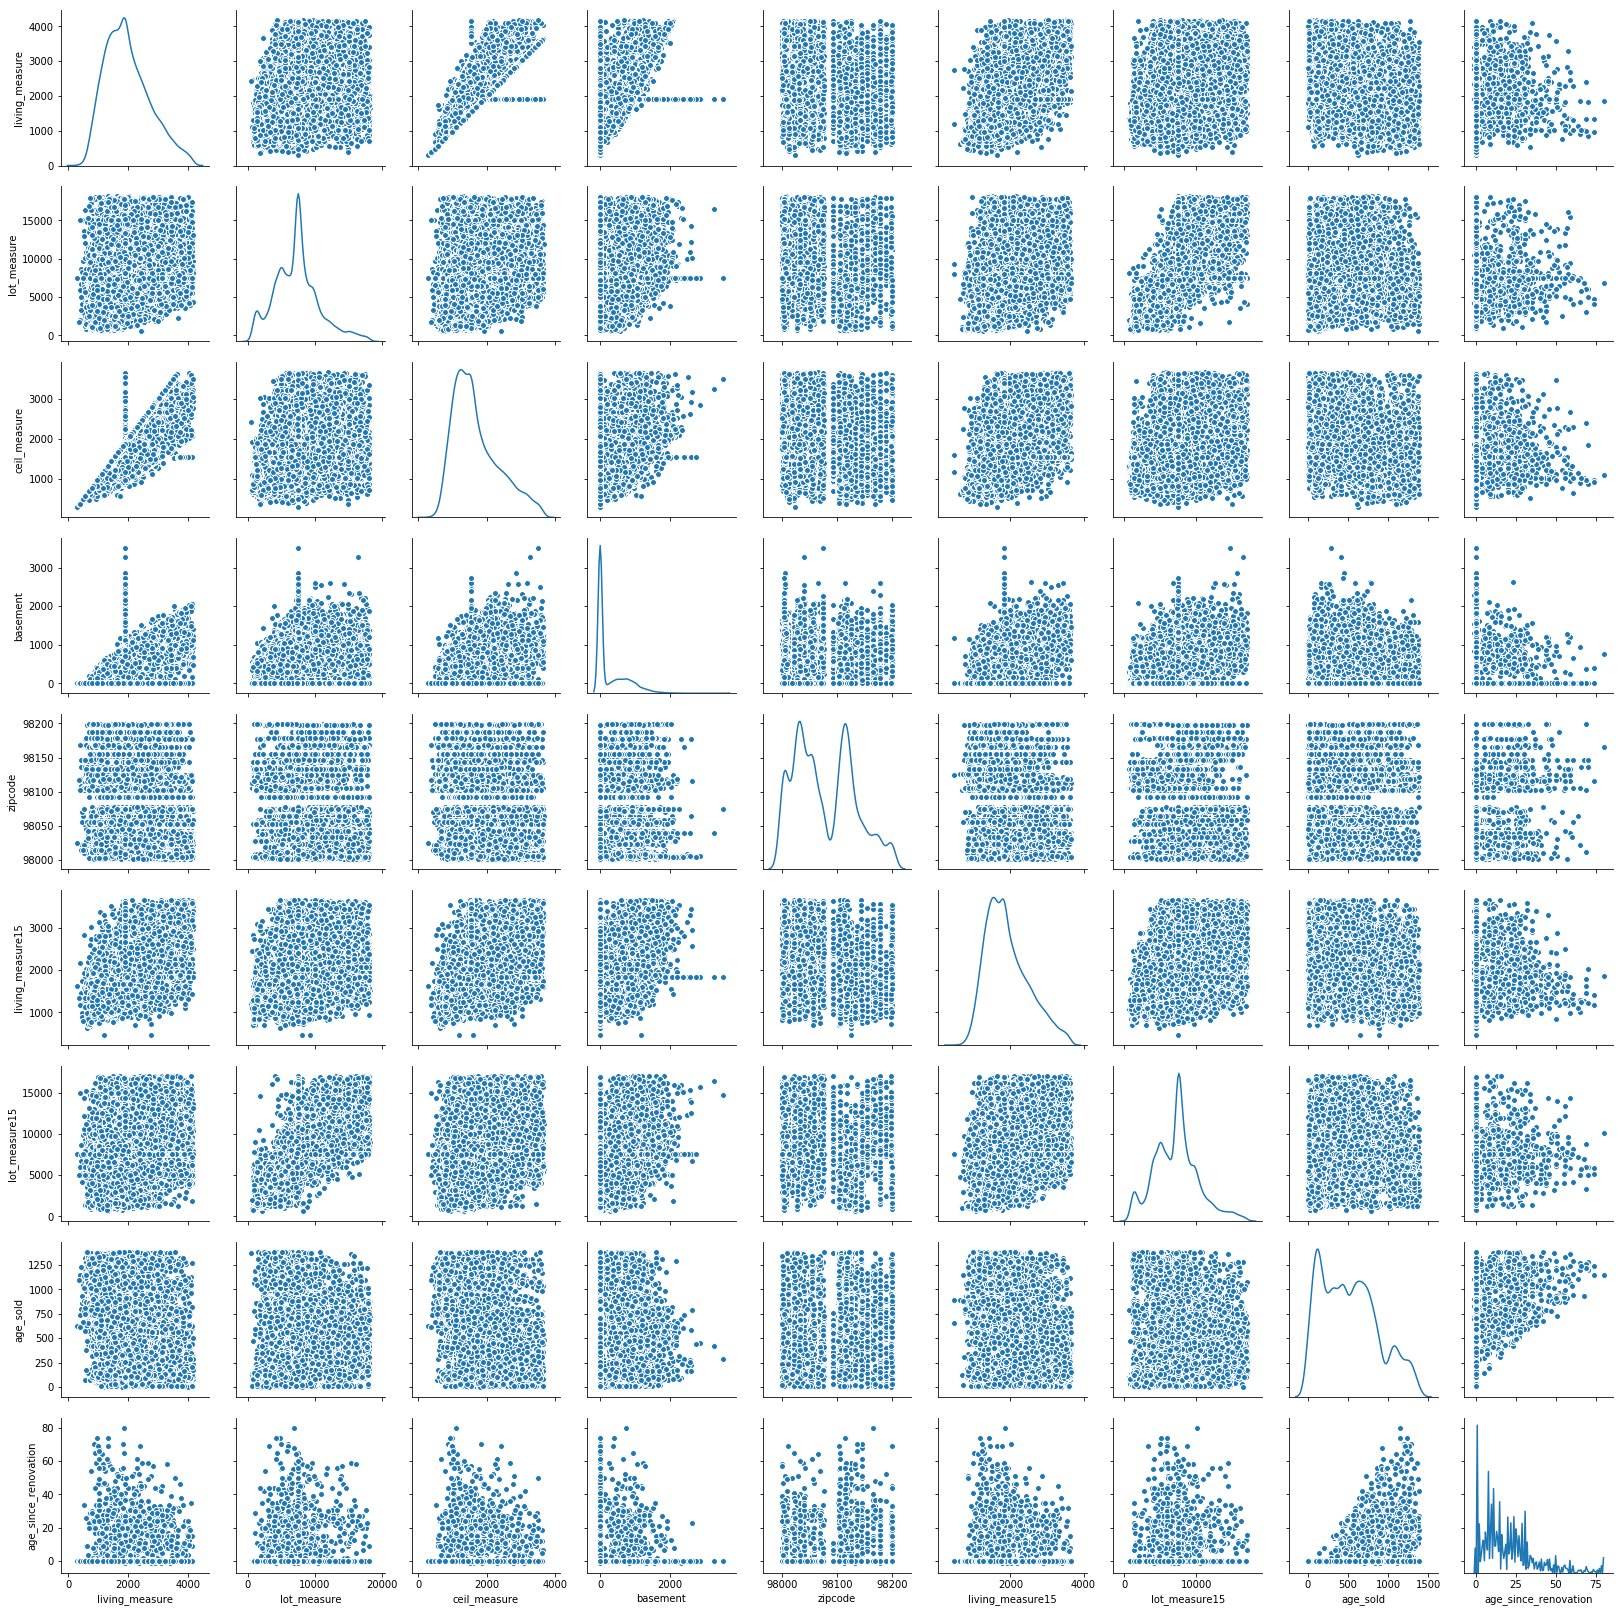

In [65]:
sns.pairplot(city_new_outlier_replaced_df[numerical_cols],diag_kind='kde')

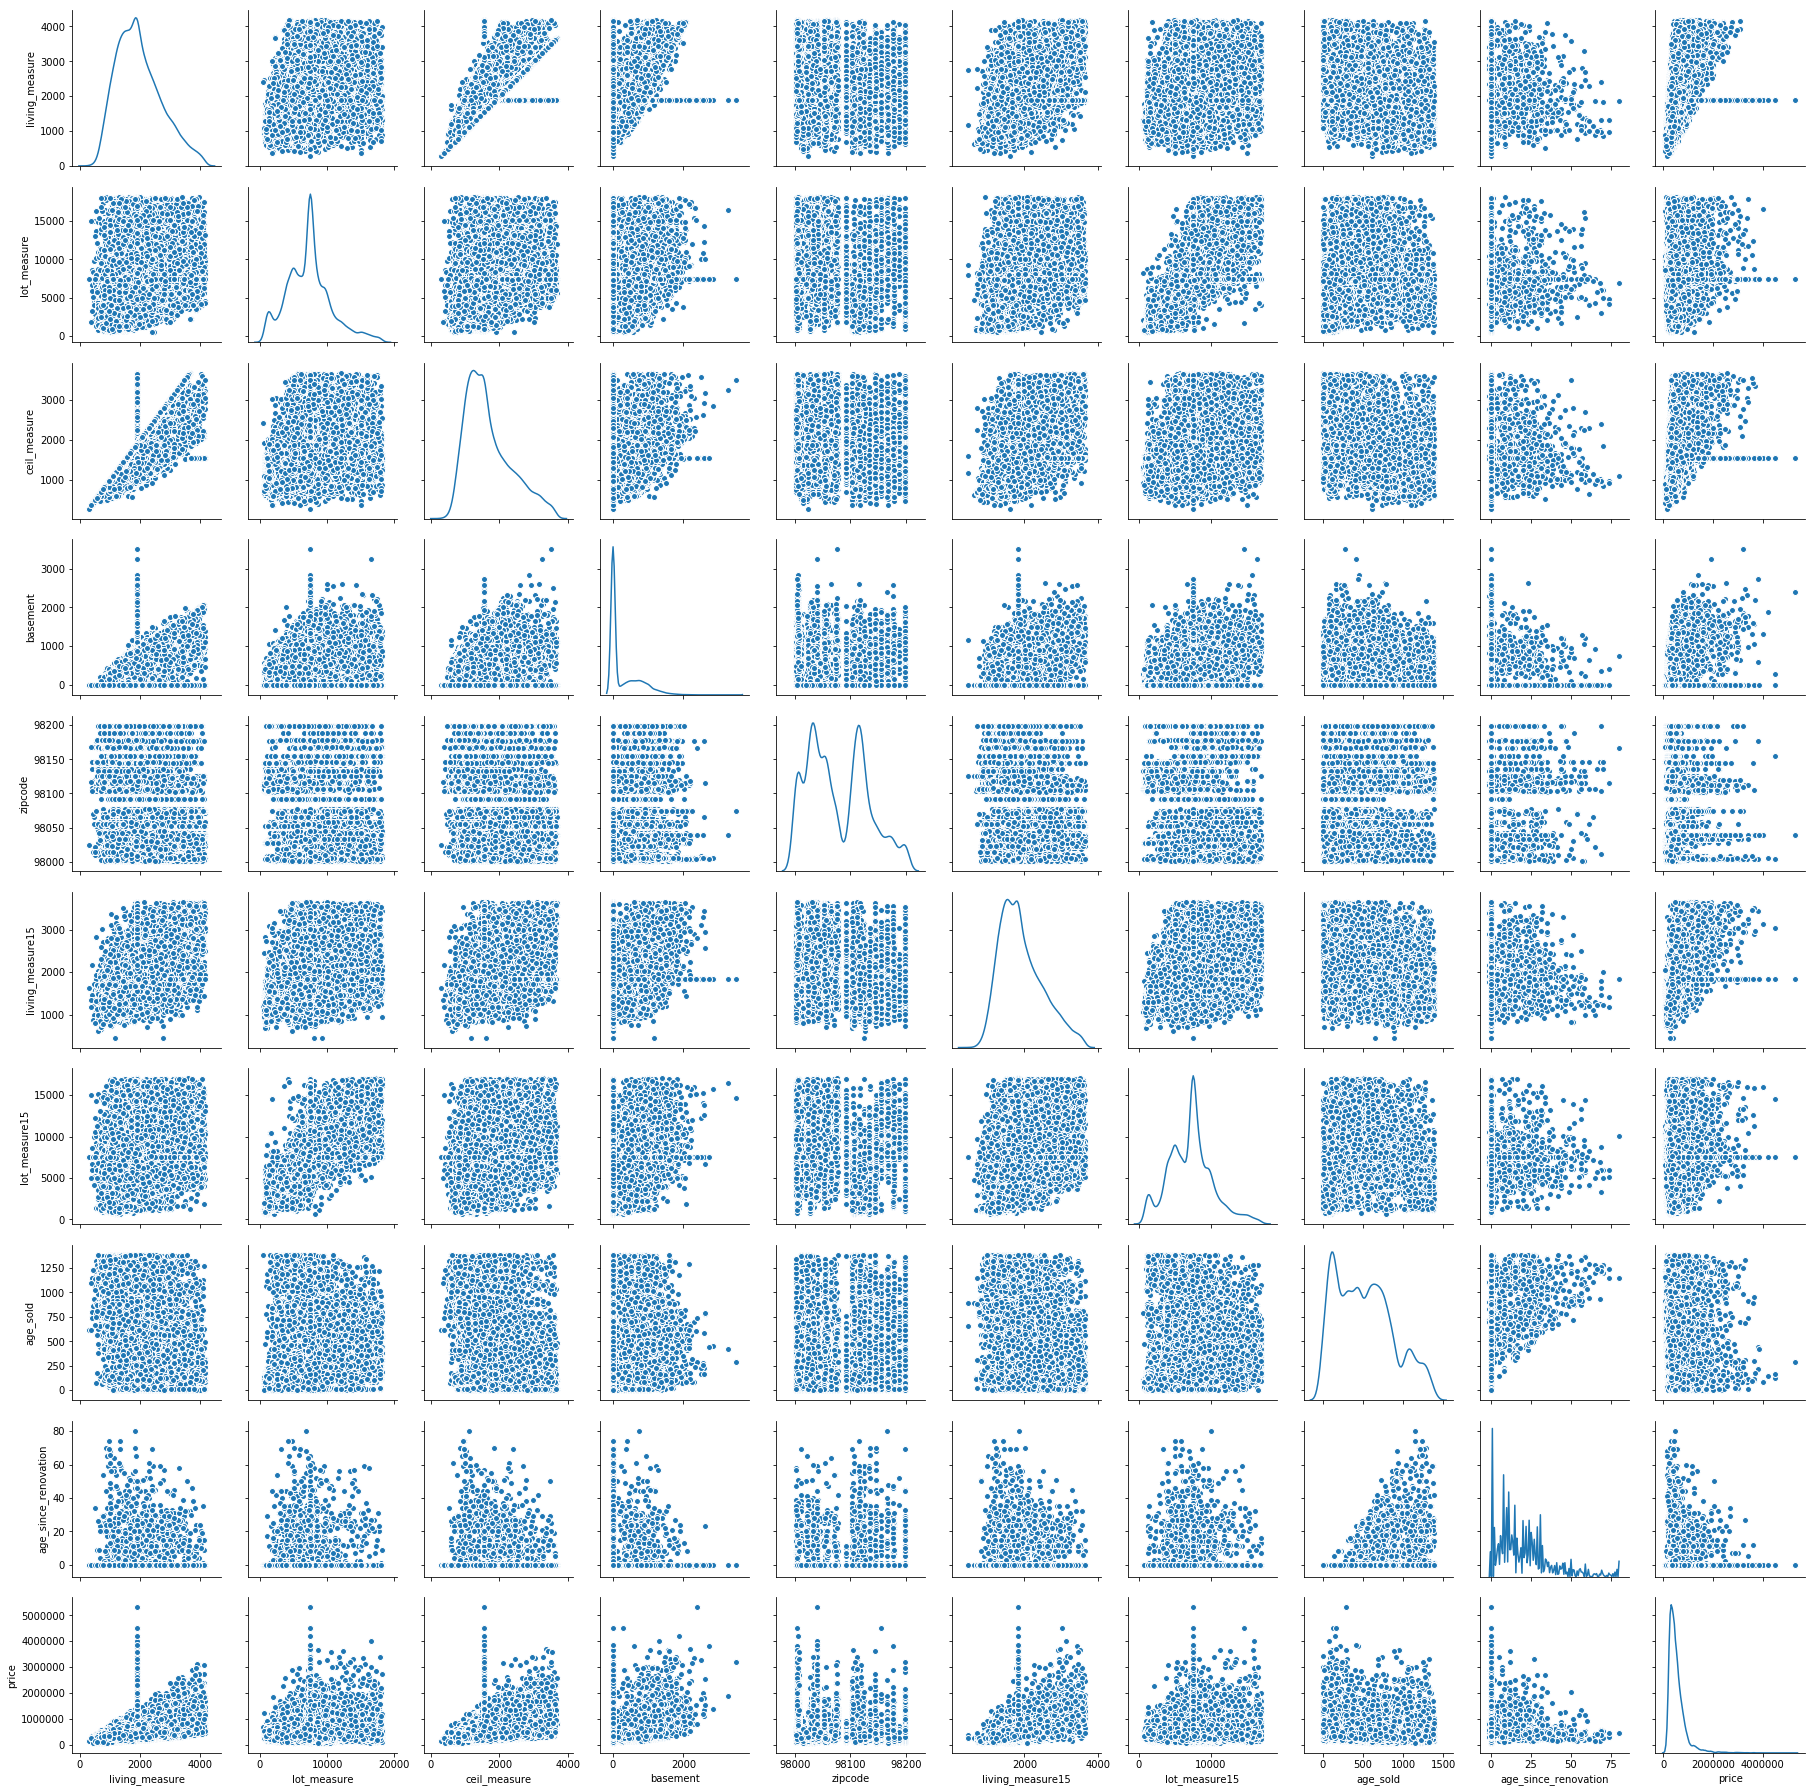

In [66]:
sns.pairplot(city_new_outlier_replaced_df[['living_measure', 'lot_measure', 'ceil_measure', 'basement', 'zipcode', 'living_measure15', 'lot_measure15', 'age_sold', 'age_since_renovation','price']],diag_kind='kde')

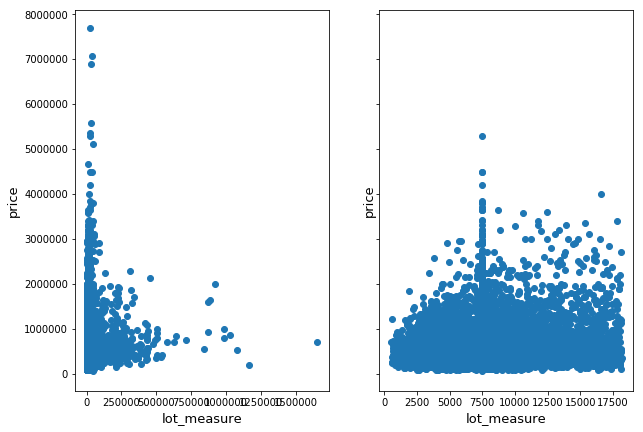

In [67]:
#let plot scatter for lot_measure before and after replacing outliers with mdeian value
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10, 7))


ax1.scatter(city_new_df['lot_measure'], city_new_df['price']);
ax1.set_ylabel('price', fontsize=13)
ax1.set_xlabel('lot_measure', fontsize=13)



ax2.scatter(city_new_outlier_replaced_df['lot_measure'], city_new_outlier_replaced_df['price'])
ax2.set_ylabel('price', fontsize=13)
ax2.set_xlabel('lot_measure', fontsize=13)

plt.show()


We can see that removing those 5% of rows from original dataframe retained only records at 0 value for age_since_renovation
We have calculated age_since_renovation column from yr_sold and yr_renovated column. For 80% of data yr_renovated is 0 which states no renovation is done.
Hence we can skip age_since_renovation column from removal and replacement  of outliers.

Same thing applies for basement column. From the below statistics we can see that most of the recors have basement as 0 which states no basement for that house.
Replacing outliers with 0 will not help here hence we can skip basement too.

In [68]:
city_new_outlier_replaced_df.describe().transpose()

count           mean            std       min  \
price                 21045.0  535176.471656  351323.987171  75000.00   
room_bed              21045.0       3.369161       0.907188      0.00   
room_bath             21045.0       2.104977       0.758925      0.00   
living_measure        21045.0    1982.216726     748.338704    290.00   
lot_measure           21045.0    7320.856973    3331.421183    520.00   
ceil                  21045.0       1.492682       0.540789      1.00   
coast                 21045.0       0.007365       0.085506      0.00   
sight                 21045.0       0.227940       0.755942      0.00   
condition             21045.0       3.411927       0.651567      1.00   
quality               21045.0       7.640485       1.157398      1.00   
ceil_measure          21045.0    1690.553433     671.907406    290.00   
basement              21045.0     290.805417     437.083679      0.00   
zipcode               21045.0   98078.780423      53.744219  98001.00   
living_measure15      21045.0    1920.372583     587.890725    460.00   
lot_measure15         21045.0    7242.468187    3045.788015    651.00   
furnished             21045.0       0.191019       0.393114      0.00   
age_sold              21045.0     529.004337     353.657335      0.26   
age_since_renovation  21045.0       0.771252       4.869055     -1.00   

                            25%        50%        75%         max  
price                 320000.00  450000.00  640000.00  5300000.00  
room_bed                   3.00       3.00       4.00       11.00  
room_bath                  1.50       2.25       2.50        7.50  
living_measure          1420.00    1900.00    2440.00     4170.00  
lot_measure             5000.00    7500.00    9000.00    18150.00  
ceil                       1.00       1.50       2.00        3.50  
coast                      0.00       0.00       0.00        1.00  
sight                      0.00       0.00       0.00        4.00  
condition                  3.00       3.00       4.00        5.00  
quality                    7.00       7.00       8.00       13.00  
ceil_measure            1190.00    1550.00    2090.00     3660.00  
basement                   0.00       0.00     560.00     3500.00  
zipcode                98033.00   98070.00   98118.00    98199.00  
living_measure15        1480.00    1830.00    2280.00     3650.00  
lot_measure15           5060.00    7532.00    8840.00    17026.00  
furnished                  0.00       0.00       0.00        1.00  
age_sold                 220.05     488.17     764.25     1384.11  
age_since_renovation       0.00       0.00       0.00       80.00

From the above numerical columns, basement and age_since_renovation has median value as 0.
Hence replacing the outliers with 0 won't help in out case. We can skip those columns while treating outliers with median
Also we can skip zipcode column as we will be replaceing zipcode with cities

Now we have 2 dataframes

1) city_new_df(with outliers)

2) city_new_wo_outlier_df(5% outliers deleted from both the tails)

3)city_new_outlier_replaced_df(outliers replaced after deleteing 5 % of outliers)

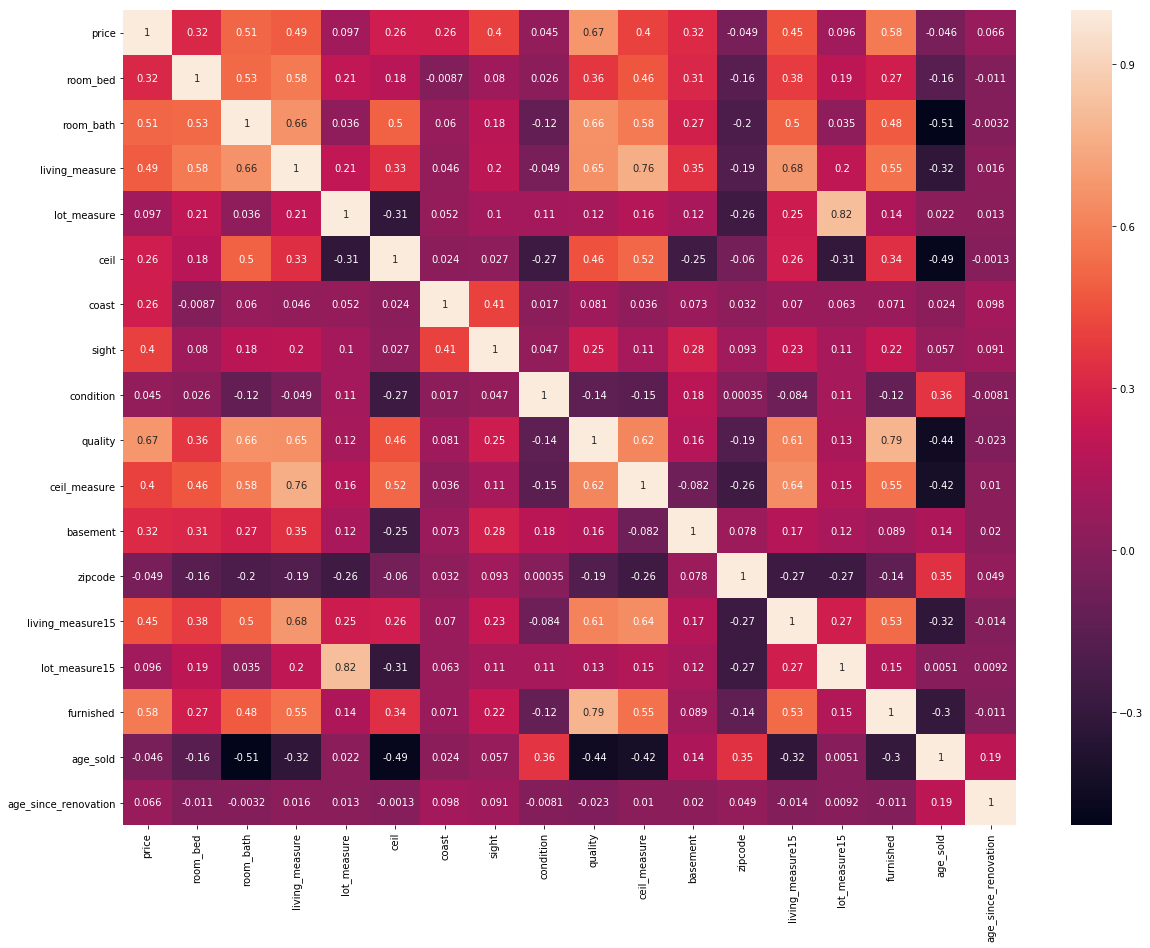

In [69]:
#lets check corelation values for new dataframe
corelation_wo_outliers=city_new_outlier_replaced_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corelation_wo_outliers,annot=True)
plt.show()

In [70]:
#lets check corelation values for new dataframe
corelation_wtih_outliers=city_new_df.corr()
#variables having corelation greater than 0.3 or less than 0.3 with target
print('corelated attributes before replacing  outliers with median:' )
corelation_wtih_outliers[(corelation_wtih_outliers.price > 0.3) | (corelation_wtih_outliers.price<-0.3)]['price']

corelated attributes before replacing  outliers with median:


price               1.000000
room_bed            0.315552
room_bath           0.525283
living_measure      0.702307
sight               0.397407
quality             0.667781
ceil_measure        0.605737
basement            0.323852
living_measure15    0.585404
furnished           0.566426
Name: price, dtype: float64

In [71]:
#variables having corelation greater than 0.3 or less than 0.3 with target
print('corelated attributes before replacing  outliers with median:' )
corelation[(corelation.price > 0.3) | (corelation.price<-0.3)]['price']

corelated attributes before replacing  outliers with median:


price               1.000000
room_bed            0.315037
room_bath           0.511525
living_measure      0.691348
sight               0.404463
quality             0.670651
ceil_measure        0.590455
basement            0.318295
living_measure15    0.593682
furnished           0.576532
Name: price, dtype: float64

In [72]:
#variables having corelation greater than 0.3 or less than 0.3 with target
print('corelated attributes after replacing  outliers with median:' )
corelation_wo_outliers[(corelation_wo_outliers.price > 0.3) | (corelation_wo_outliers.price<-0.3)]['price']

corelated attributes after replacing  outliers with median:


price               1.000000
room_bed            0.315037
room_bath           0.511525
living_measure      0.485410
sight               0.404463
quality             0.670651
ceil_measure        0.404887
basement            0.318295
living_measure15    0.454780
furnished           0.576532
Name: price, dtype: float64

From the above corelation metric with outliers, removed 5% if outliers and outliers replaced with median we can infer that:
    
1) Corelation of outliers column drops by 10-15% at the end when we removed outlier columns followed by  replacing outliers with median value of those columns.


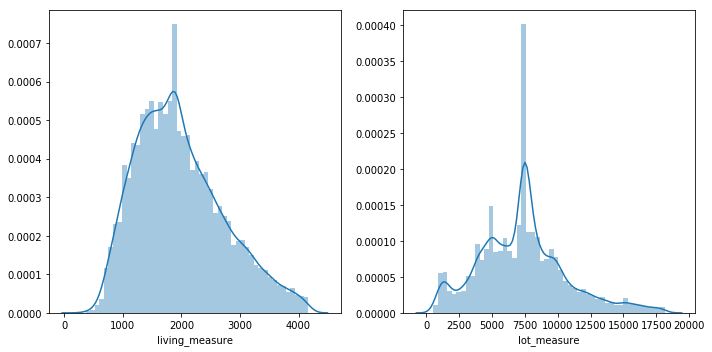

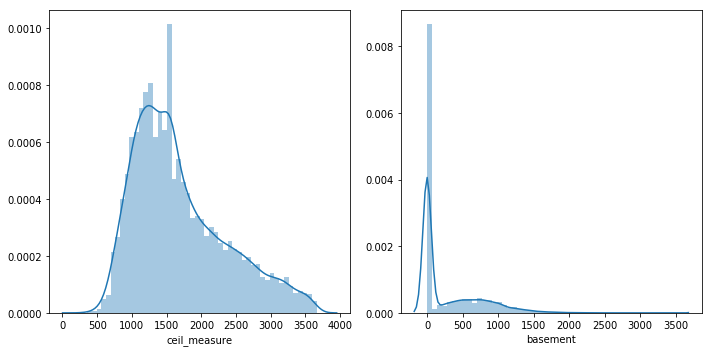

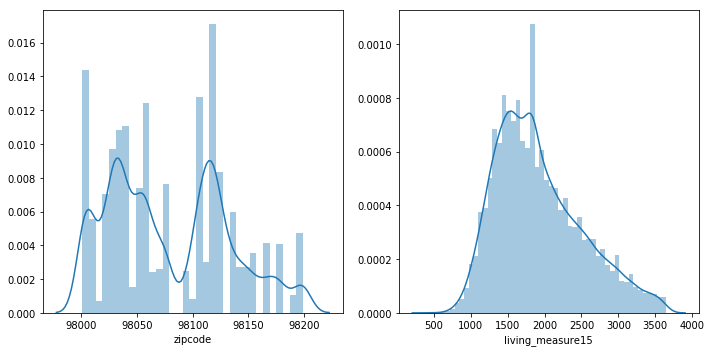

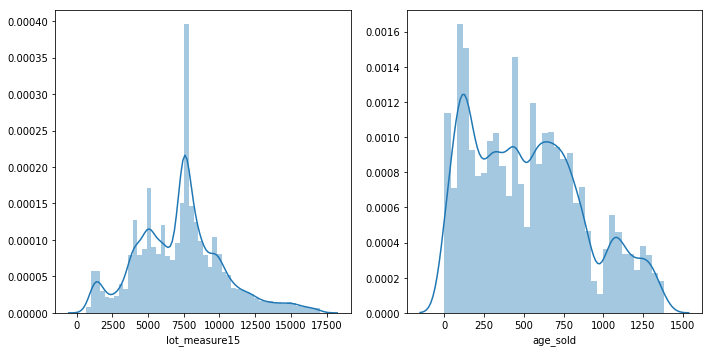

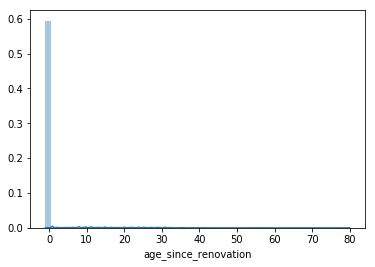

In [73]:
#lets check the dstribution of each column
# Histograms
for i in range(0,len(numerical_cols),2):
    if len(numerical_cols) > i+1:
        plt.figure(figsize=(10,5))
        plt.subplot(121)
        sns.distplot(city_new_outlier_replaced_df[numerical_cols[i]])
        plt.subplot(122)            
        sns.distplot(city_new_outlier_replaced_df[numerical_cols[i+1]])
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(city_new_outlier_replaced_df[numerical_cols[i]])
        
    


None of the numerical column is normally distributed. There are many peaks in almost all the numerical columns.
All the columns have long tails and concentration of values are more at one point.


In [74]:
#pairplot analysis of price with 'living_measure','ceil_measure','basement' columns

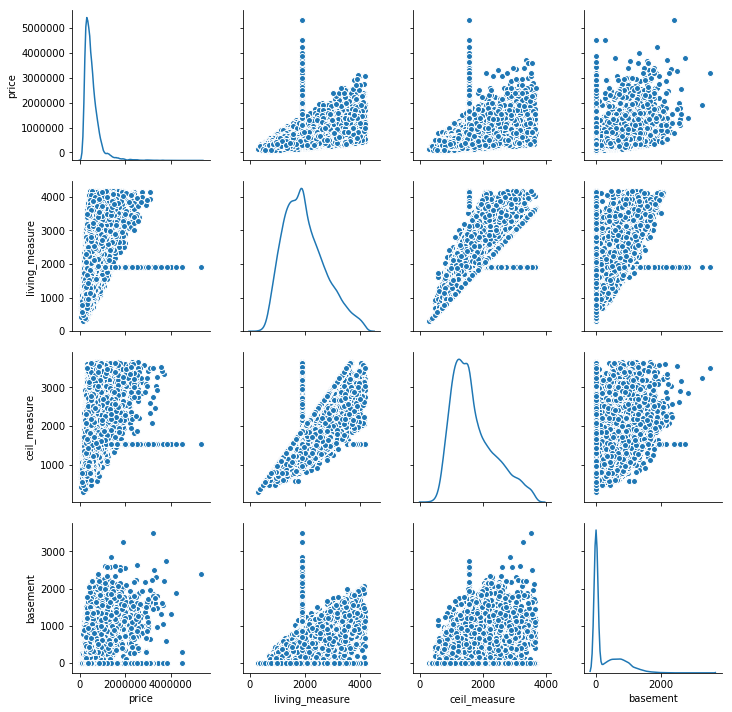

In [75]:
sns.pairplot(city_new_outlier_replaced_df,diag_kind='kde',vars=['price','living_measure','ceil_measure','basement'])

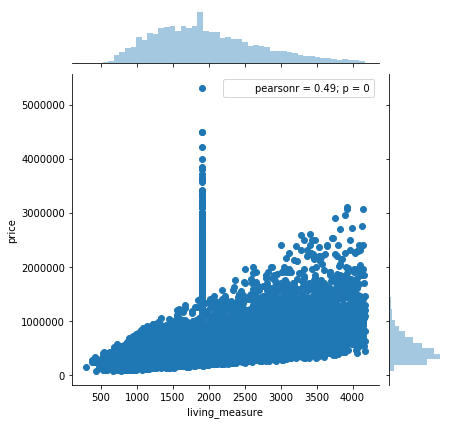

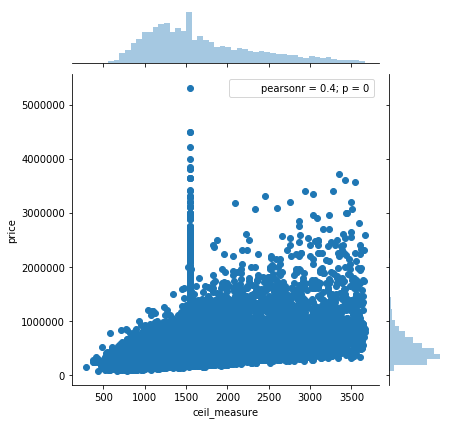

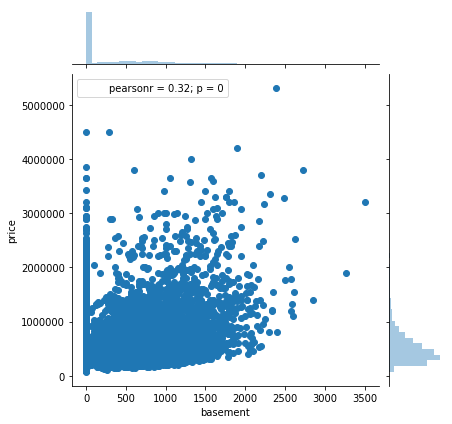

In [76]:
#lets check the scatter plot for area columns

cols1=['living_measure','ceil_measure','basement']
for i in range(0,len(cols1),2):
    if len(cols1) > i+1:
        sns.jointplot(city_new_outlier_replaced_df[cols1[i]],city_new_outlier_replaced_df['price'])            
        sns.jointplot(city_new_outlier_replaced_df[cols1[i+1]],city_new_outlier_replaced_df['price'])

    else:
        sns.jointplot(city_new_outlier_replaced_df[cols1[i]],city_new_outlier_replaced_df['price'])
        
    


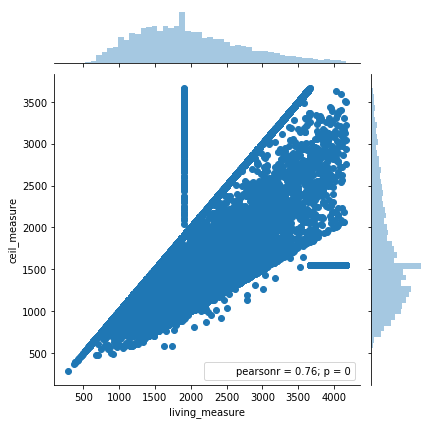

In [77]:
sns.jointplot(city_new_outlier_replaced_df['living_measure'],city_new_outlier_replaced_df['ceil_measure'])

From above pairplot and jointplot, we can infer that

1)There exists high corelation of price variable with living measure and ceil_measure

2)living measure and ceil_measure are highly corelated

3) Distribution of living measure and ceil_measure is normal with small tails at right end

4) Distribution for basement has 2 peaks with tails


Here we can drop off ceil_measure column as living measure column is highly corelated with target one. 
So we will retain living_measure column and basement column

In [78]:
city_new_outlier_replaced_df.drop(columns=['ceil_measure'],axis=1,inplace=True)

In [79]:
city_new_outlier_replaced_df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'basement', 'zipcode',
       'living_measure15', 'lot_measure15', 'furnished', 'age_sold',
       'age_since_renovation'],
      dtype='object')

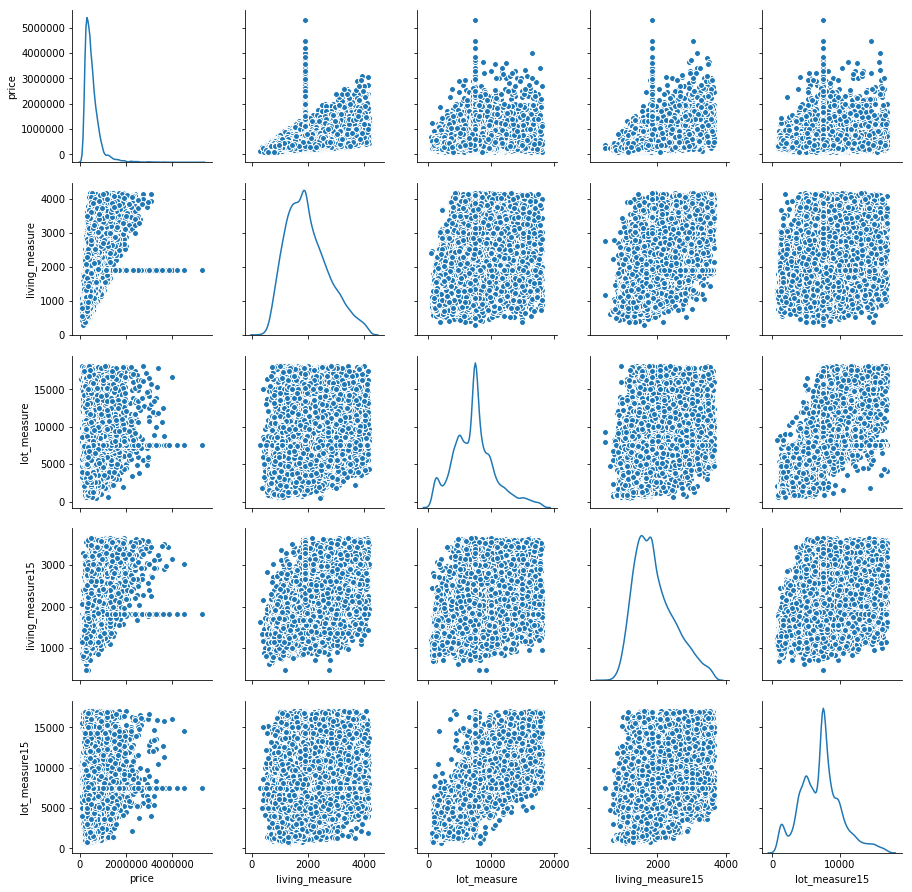

In [80]:
sns.pairplot(city_new_outlier_replaced_df[['price','living_measure','lot_measure','living_measure15','lot_measure15']],diag_kind='kde')

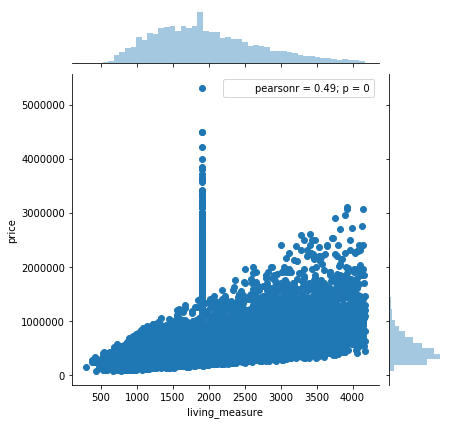

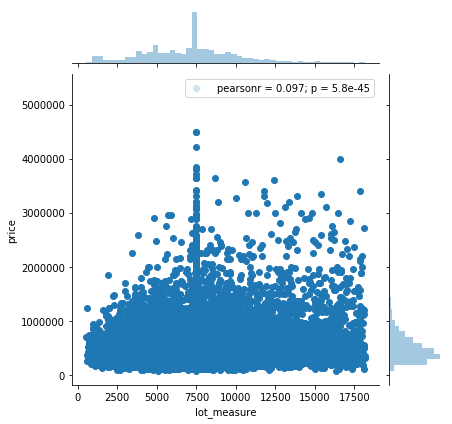

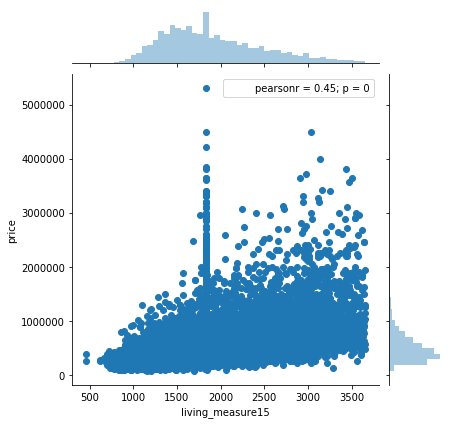

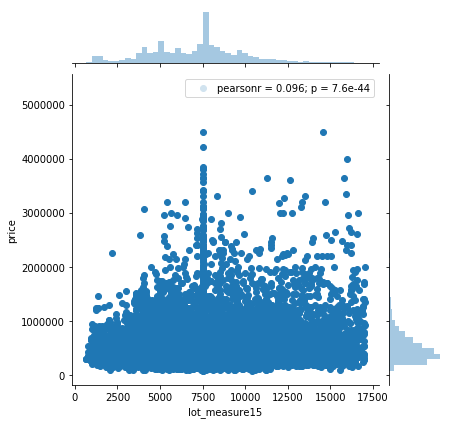

In [81]:
#lets check the scatter plot for area columns

cols2=['living_measure','lot_measure','living_measure15','lot_measure15']
for i in range(0,len(cols2),2):
    if len(cols2) > i+1:
        sns.jointplot(city_new_outlier_replaced_df[cols2[i]],city_new_outlier_replaced_df['price'])            
        sns.jointplot(city_new_outlier_replaced_df[cols2[i+1]],city_new_outlier_replaced_df['price'])

    else:
        sns.jointplot(city_new_outlier_replaced_df[cols2[i]],city_new_outlier_replaced_df['price'])
        
    


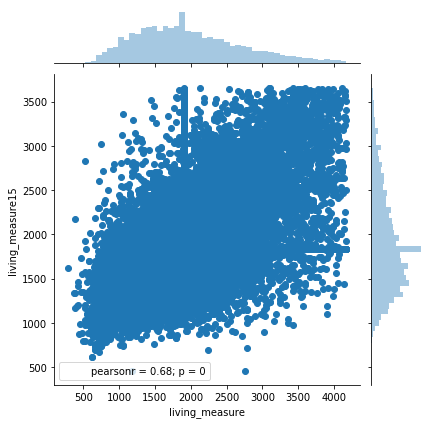

In [82]:
sns.jointplot('living_measure','living_measure15',data=city_new_outlier_replaced_df)

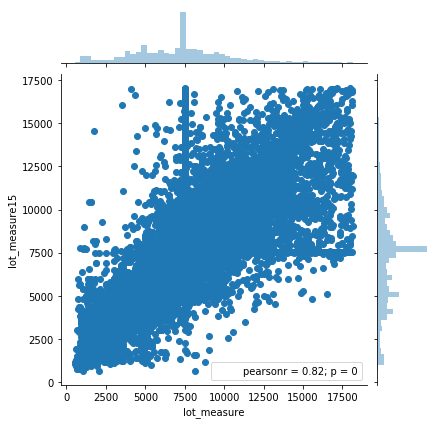

In [83]:
sns.jointplot('lot_measure','lot_measure15',data=city_new_outlier_replaced_df)

From above pairplot and jointplot we can see that, living_measure have 0.49 and living_measure15 have 0.45 corelation with price.
Also lot_measure and lot_measure15 has very low corelation with target column.
We cannot drop any of the column as between lot_measure and lot_measure15 there exists 0.82% corelation and between living_measure and living_measure15 there exists 0.68% corelation
If we drop any of the column, there will be information loss

# let's check a way to combine catgeorical value

In [84]:
categorical_cols

['coast',
 'condition',
 'sight',
 'quality',
 'furnished',
 'ceil',
 'room_bed',
 'room_bath']

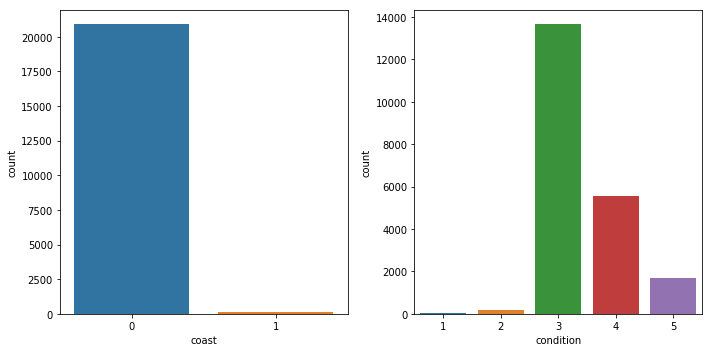

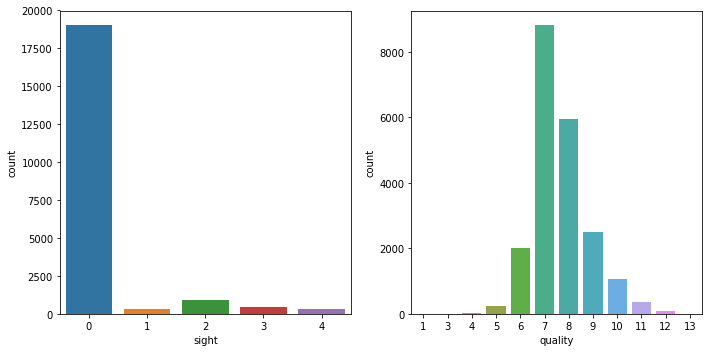

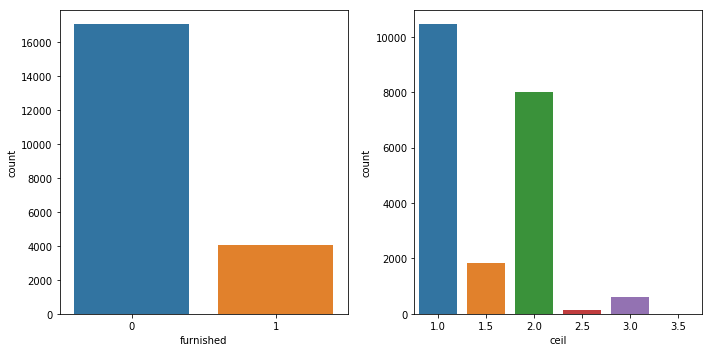

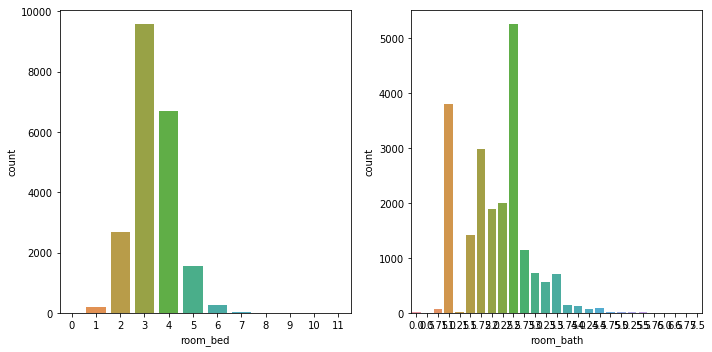

In [85]:
#lets check the dstribution of each column
# Histograms
for i in range(0,len(categorical_cols),2):
    if len(categorical_cols) > i+1:
        plt.figure(figsize=(10,5))
        plt.subplot(121)
        sns.countplot(city_new_outlier_replaced_df[categorical_cols[i]])
        plt.subplot(122)            
        sns.countplot(city_new_outlier_replaced_df[categorical_cols[i+1]])
        plt.tight_layout()
        plt.show()

    else:
        sns.countplot(city_new_df[city_new_outlier_replaced_df[i]])
        
    


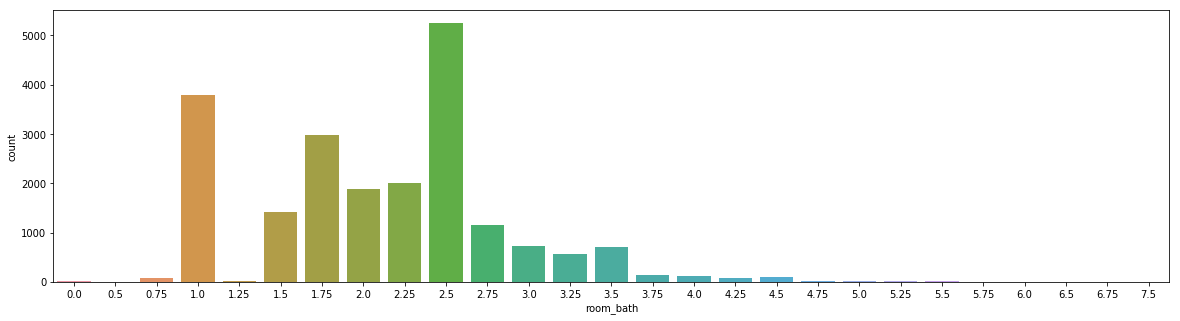

In [86]:
#let plot countplot for room_bath wider for better visibility.
plt.figure(figsize=(20,5))
sns.countplot('room_bath',data=city_new_outlier_replaced_df)
plt.show()

In [87]:
city_new_outlier_replaced_df[city_new_outlier_replaced_df.coast==0].shape

(20890, 17)

For  furnished,sight and coast column, more number of records are for 0 value

Around approx 98% of data have no view to waterfront

Most of the flats have 2-5 bedroom in the house

For bathroom, the count is higher for 1,1.75 and 2.5 values. There are very few records with bathroom as 0 value which shouldn't be the case.This is an indication of outlier for room_bath column for 0 value(10 records). 
Also very few records for number of bathrooms greater than 5 which can be a case. Verified from excel that for more number of bedrooms, we have more bathrooms.

For ceil, most of the flats have floors in the range of 1-2

Most of the houses having average quality.

The number of unfurnished flats are much more higher compared to furnished flats.




In [88]:
#lets compare categorical variables with price columns

In [89]:
city_new_outlier_replaced_df.coast.value_counts()

0    20890
1      155
Name: coast, dtype: int64

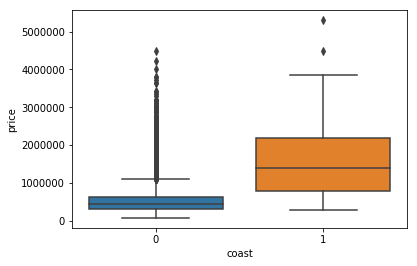

In [90]:
sns.boxplot(x='coast',y='price',data=city_new_outlier_replaced_df)

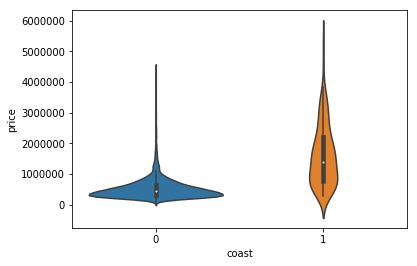

In [91]:
sns.violinplot(x='coast',y='price',data=city_new_outlier_replaced_df)

As we can see that price for houses which has no view to waterfront comparatively have lower prices to those which has waterfront.
Also for coast=0 have many outliers.

For houses with coast=1 there exists few outliers.

Coast can be a good predictor for target variable as 2 categories are separated properly wrt price column.

For furnished column

In [92]:
city_new_outlier_replaced_df.furnished.value_counts()

0    17025
1     4020
Name: furnished, dtype: int64

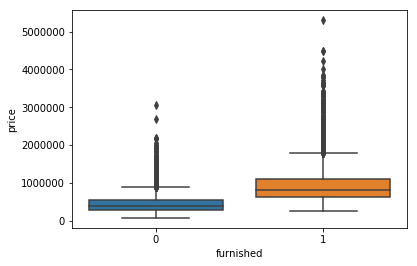

In [93]:
sns.boxplot(x='furnished',y='price',data=city_new_outlier_replaced_df)


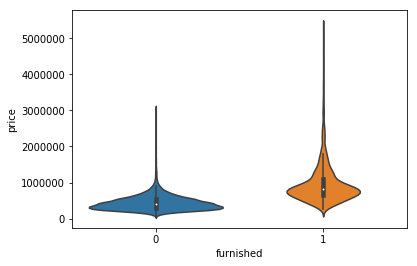

In [94]:
sns.violinplot(x='furnished',y='price',data=city_new_outlier_replaced_df)

Flats which are furnished, have higher prices compared to unfurnished flats. Also there exists more outlier in both categories.
Furnished is also a good predictor column for target column.


For condition column

In [95]:
city_new_outlier_replaced_df.condition.value_counts()

3    13649
4     5536
5     1674
2      157
1       29
Name: condition, dtype: int64

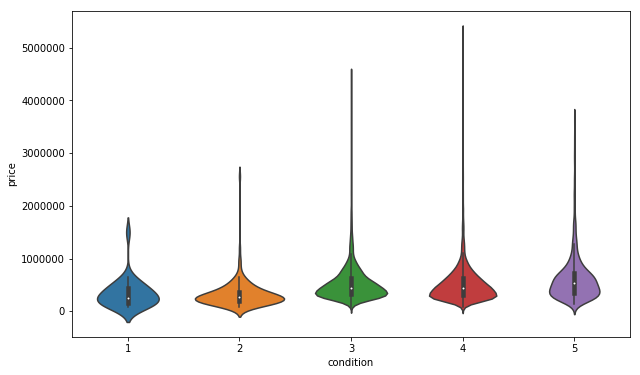

In [96]:
plt.figure(figsize=(10,6))
sns.violinplot(x='condition',y='price',data=city_new_outlier_replaced_df)
plt.show()

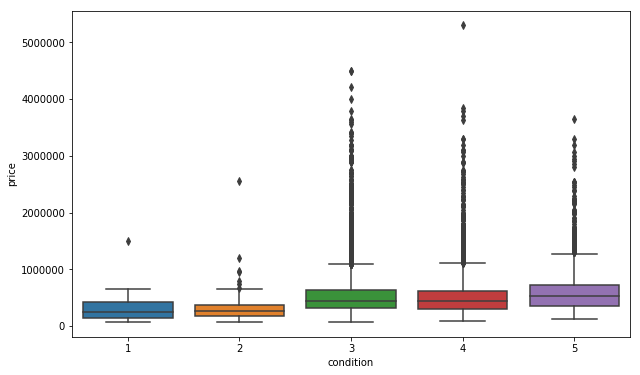

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(x='condition',y='price',data=city_new_outlier_replaced_df)
plt.show()

sns.swarmplot(x='condition',y='price',data=city_new_df)

We can see that for different conditions, prices are overlapping and hence condition alone is not  a good predictor for price column. Also for condition 3,4 and 5 number of houses are more comparatively.

Quality column

In [98]:
city_new_outlier_replaced_df.quality.value_counts()

7     8820
8     5946
9     2506
6     1996
10    1066
11     365
5      231
12      75
4       28
13       8
3        3
1        1
Name: quality, dtype: int64

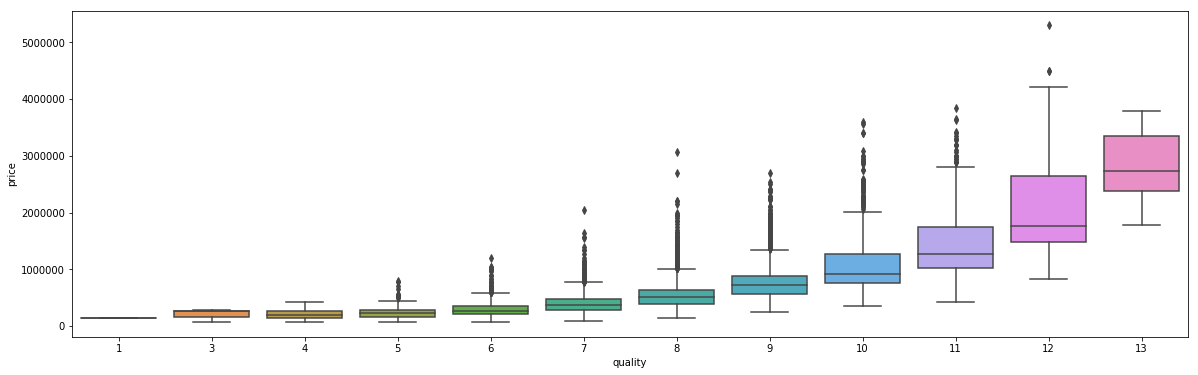

In [99]:
plt.figure(figsize=(20,6))
sns.boxplot(x='quality',y='price',data=city_new_outlier_replaced_df)
plt.show()

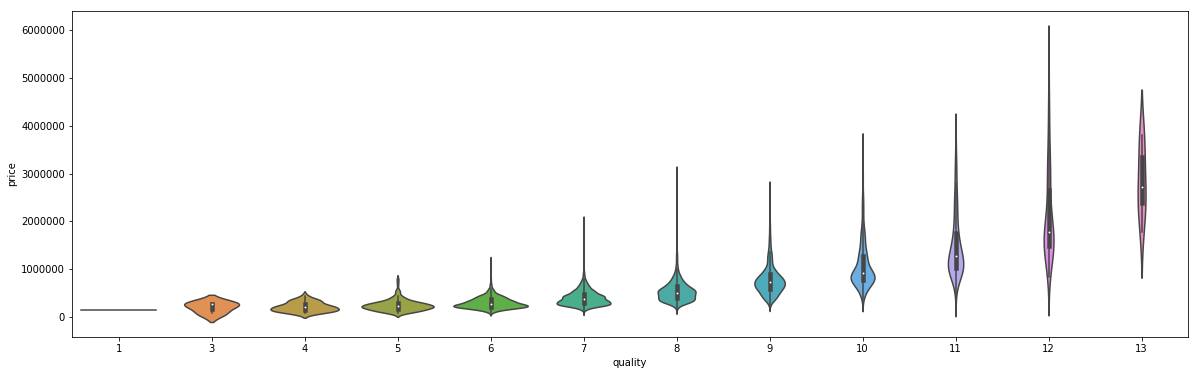

In [100]:
plt.figure(figsize=(20,6))
sns.violinplot(x='quality',y='price',data=city_new_outlier_replaced_df)
plt.show()

We can see that there outliers present between 5-11 catgories.

Also its being observed that as the quality increases, price of house increases. Hence quality is a best predictor variable.

Sight column

In [101]:
city_new_outlier_replaced_df.sight.value_counts()

0    19023
2      918
3      471
1      328
4      305
Name: sight, dtype: int64

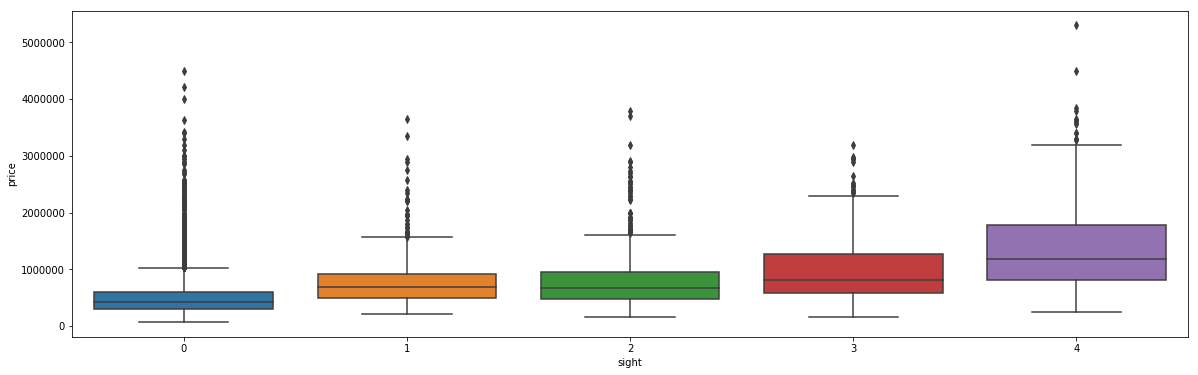

In [102]:
plt.figure(figsize=(20,6))
sns.boxplot(x='sight',y='price',data=city_new_outlier_replaced_df)
plt.show()

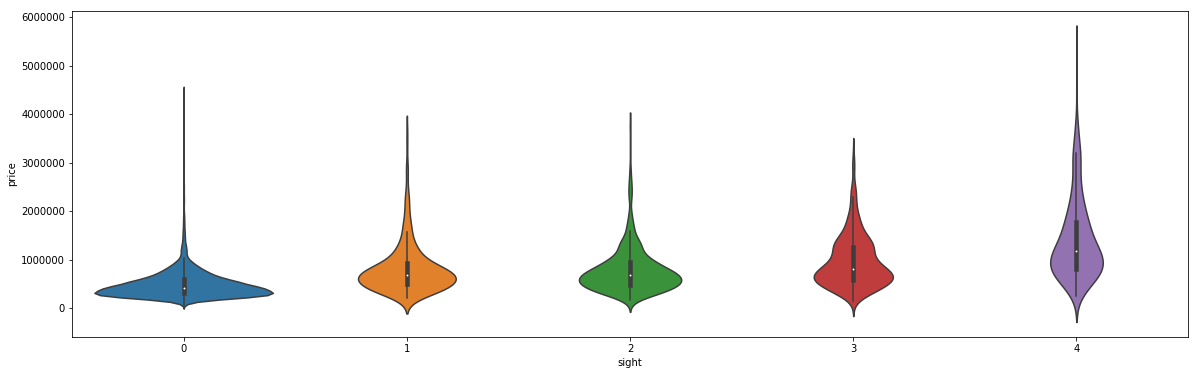

In [103]:
plt.figure(figsize=(20,6))
sns.violinplot(x='sight',y='price',data=city_new_outlier_replaced_df)
plt.show()

From the above box plot we can see the greater the number of sights, greater the house price.
Though there are some outliers present, sight column can be used to predict target value.

For bedrooms

In [104]:
city_new_outlier_replaced_df.room_bath.value_counts()

2.50    5248
1.00    3792
1.75    2975
2.25    1999
2.00    1883
1.50    1420
2.75    1152
3.00     723
3.50     699
3.25     558
3.75     146
4.00     125
4.50      94
4.25      71
0.75      69
4.75      21
5.00      19
5.25      11
0.00      10
1.25       9
5.50       8
6.00       5
0.50       4
7.50       1
6.75       1
6.50       1
5.75       1
Name: room_bath, dtype: int64

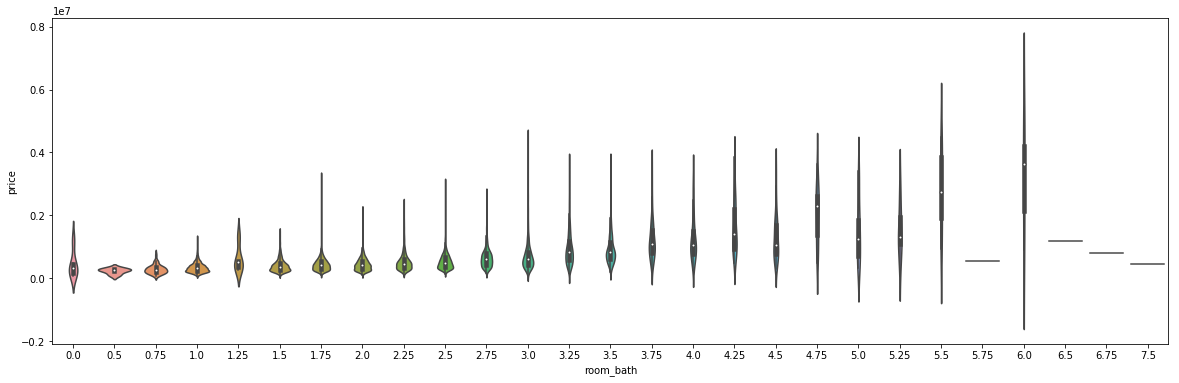

In [105]:
plt.figure(figsize=(20,6))
sns.violinplot(x='room_bath',y='price',data=city_new_outlier_replaced_df)
plt.show()

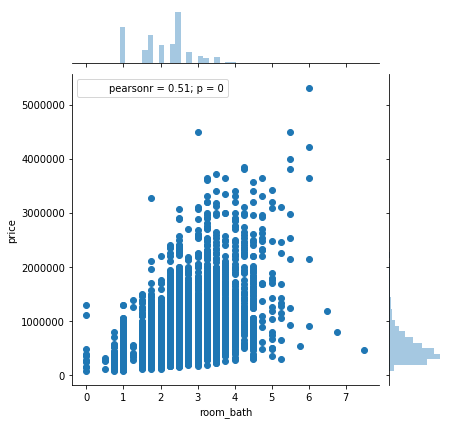

In [106]:
plt.figure(figsize=(20,12))
sns.jointplot('room_bath','price',data=city_new_outlier_replaced_df)
plt.show()

As room_bath increases, price of house increases.Hence is also a good predictor for price variable.
There are outliers present in room_bath column

For room_bed column

In [107]:
city_new_outlier_replaced_df.room_bed.value_counts()

3     9568
4     6703
2     2692
5     1559
6      260
1      191
7       37
8       13
0       12
9        6
10       3
11       1
Name: room_bed, dtype: int64

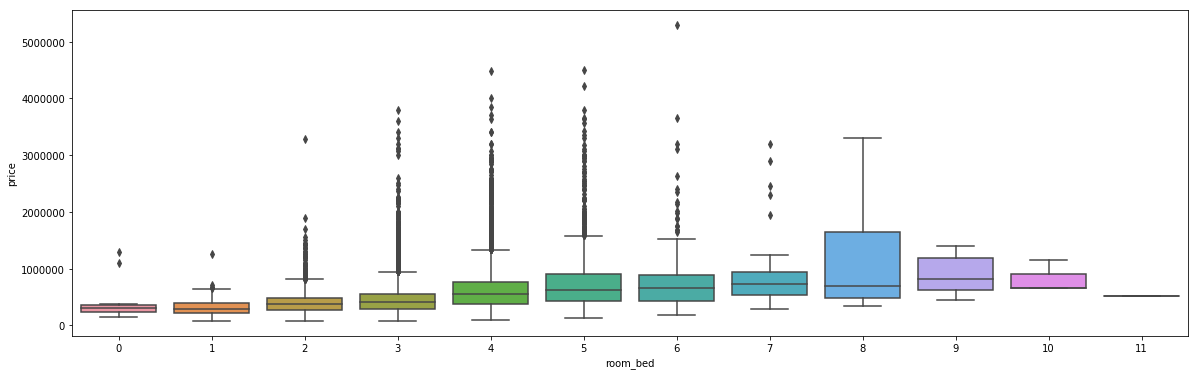

In [108]:
plt.figure(figsize=(20,6))
sns.boxplot(x='room_bed',y='price',data=city_new_outlier_replaced_df)
plt.show()

As we can see that as the number of bedroom increases, price of house increases.
At the end for 11 bedroom there is decrease in price.
But still we can consider number of bedrooms as good predictor variable.

Let's check the  relationship between categorical variables

In [109]:
from scipy.stats import chisquare,chi2_contingency

In [110]:
#lets construct a dataframe of p_values for relationship between categorical variable. This p_value is calculated based on chi2_contingency test.
p_dict={}
for cols in categorical_cols:
    a=[]
    for c in categorical_cols:
        ct=pd.crosstab(city_new_outlier_replaced_df[cols],city_new_outlier_replaced_df[c])
        chi2,p_val,dof,expected=chi2_contingency(ct)
        a.append(p_val)
    p_dict[cols]=a
        
    

In [111]:
p_val_df=pd.DataFrame(p_dict,index=categorical_cols)

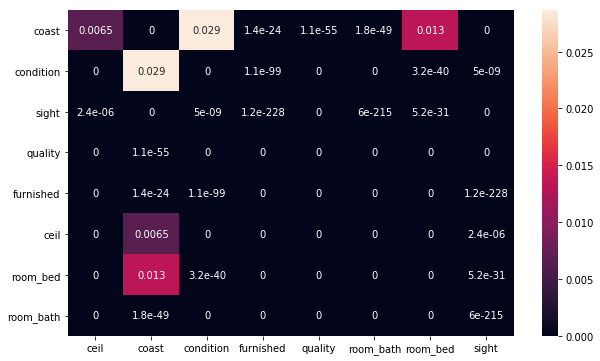

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(p_val_df,annot=True)
plt.show()

We can see that p values for all combination of categorical variables is less than 0.05.
Hence all the categorical variables are related with reach other i.e dependency exists.

In [113]:
#pd.crosstab(city_new_outlier_replaced_df['room_bed'],city_new_outlier_replaced_df['room_bath'])

In [114]:
#crosstab from original dataframe.
pd.crosstab(city_new_outlier_replaced_df['coast'],city_new_outlier_replaced_df['quality'])

quality  1   3   4    5     6     7     8     9     10   11  12  13
coast                                                              
0         1   3  28  227  1984  8799  5908  2481  1038  346  67   8
1         0   0   0    4    12    21    38    25    28   19   8   0

We can combine coast and quality . Like if we have coast ==1 then for quality we can add value as 1.
We can see from the below crosstab data. For quality 13 there no record with coast as 1. Hence we can increase the quality by 1 for those houses if coast is 1.

In [115]:
#:Let's combine categorical variables

In [116]:
categorical_var_engineered=city_new_outlier_replaced_df.copy(deep=True)

In [117]:
categorical_var_engineered.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'basement', 'zipcode',
       'living_measure15', 'lot_measure15', 'furnished', 'age_sold',
       'age_since_renovation'],
      dtype='object')

In [118]:
#city_new_df.to_csv('original_dataser_with2columns_added',encoding='utf-8',index=True)

In [119]:
categorical_var_engineered['overall_quality']=categorical_var_engineered.quality+categorical_var_engineered.condition

In [120]:
#create a column overall_quality with coast columns


for index,rows in categorical_var_engineered.iterrows():
    if rows['coast']==1:
        categorical_var_engineered.at[index,'overall_quality']=rows['overall_quality']+2


In [121]:
#create a column overall_quality with furnished columns

for index,rows in categorical_var_engineered.iterrows():
    if rows['furnished']==1:
        categorical_var_engineered.at[index,'overall_quality']=rows['overall_quality']+2


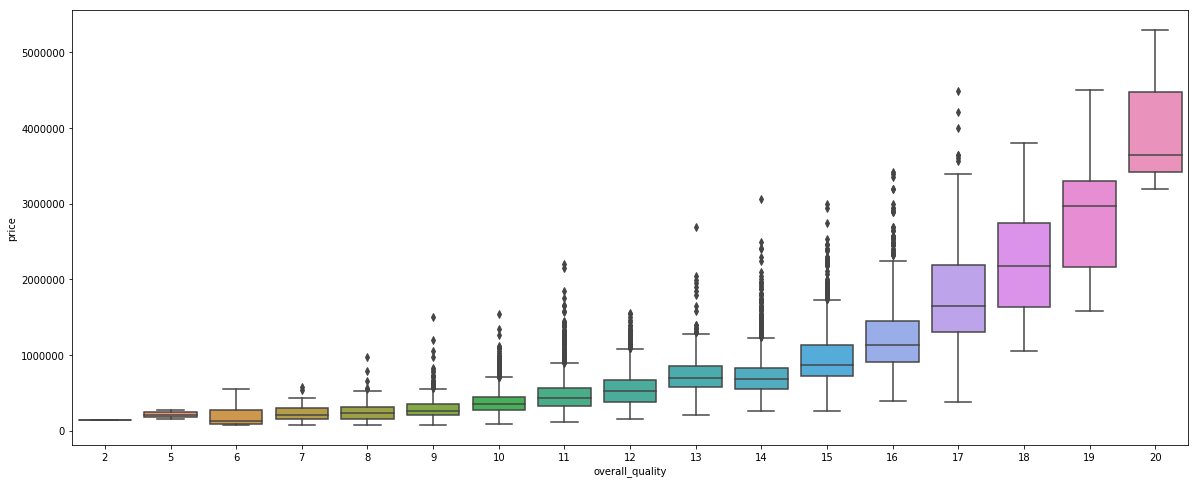

In [122]:
#boxplot of overall quality which is combination of furnished, coast, condition and quality
plt.figure(figsize=(20,8))
sns.boxplot('overall_quality','price',data=categorical_var_engineered)
plt.show()

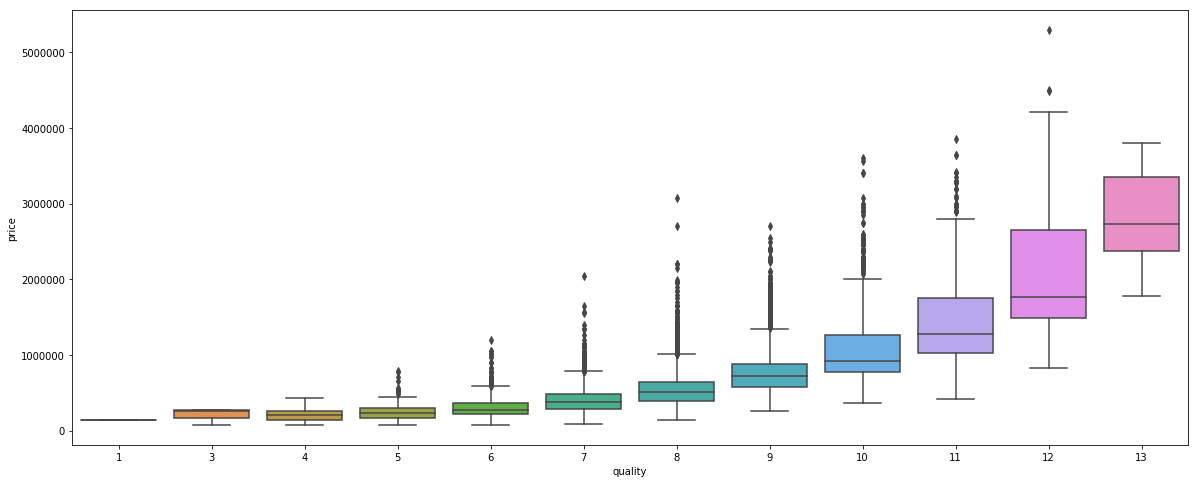

In [123]:
#boxplot of quality with price before combining variables
plt.figure(figsize=(20,8))
sns.boxplot('quality','price',data=city_new_outlier_replaced_df)
plt.show()

from the above two databox plots we can see that we can see that combined  column is better predictor of price column as compared to earlier column.


In [124]:
categorical_var_engineered.drop(columns=['coast','condition','quality','furnished'],inplace=True)

In [125]:
#let's check using pairplot how quality varies with price

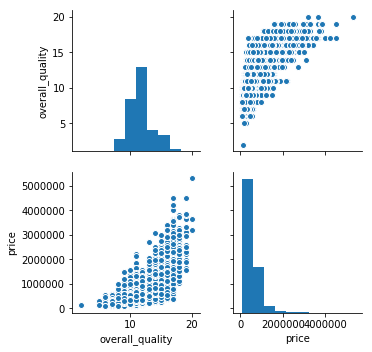

In [126]:
sns.pairplot(categorical_var_engineered[['overall_quality','price']])

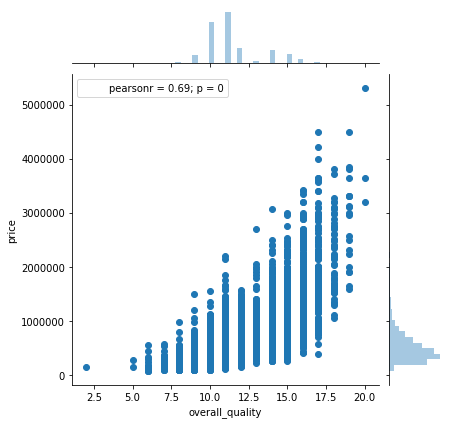

In [127]:
sns.jointplot(categorical_var_engineered['overall_quality'],categorical_var_engineered['price'])

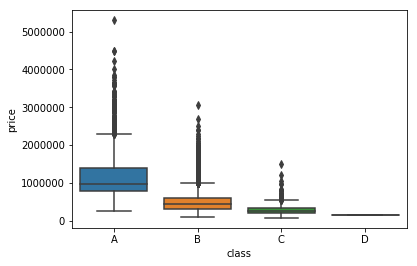

In [128]:
#divide overall quality into classes
def creat_class_for_overall_quality(df):
    df['class']=''
    for index,row in df.iterrows():
        if 15<=row['overall_quality']<=20:
            df.at[index,'class']='A'
        elif 10<=row['overall_quality']<15:
            df.at[index,'class']='B'
        elif 5<=row['overall_quality']<10:
            df.at[index,'class']='C'
        else:
            df.at[index,'class']='D'
    df.drop(columns=['overall_quality'],inplace=True)
    return df

categorical_var_engineered=creat_class_for_overall_quality(categorical_var_engineered)

sns.boxplot(categorical_var_engineered['class'],categorical_var_engineered.price)
        

In [129]:
categorical_var_engineered.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'sight', 'basement', 'zipcode', 'living_measure15',
       'lot_measure15', 'age_sold', 'age_since_renovation', 'class'],
      dtype='object')

Let's map zip code to cities

In [130]:
# the dictuionary of cities and zipcode mapping which we have created
zipcod_city_dicyionary={98177: 'Seattle', 98178: 'Seattle', 98052: 'Redmond', 98053: 'Redmond', 98055: 'Renton', 98056: 'Renton', 98058: 'Renton', 98059: 'Renton', 98188: 'Seattle', 98065: 'Snoqualmie', 98198: 'Seattle', 98199: 'Seattle', 98072: 'Woodinville', 98070: 'Vashon', 98074: 'Sammamish', 98075: 'Sammamish', 98077: 'Woodinville', 98092: 'Auburn', 98102: 'Seattle', 98103: 'Seattle', 98105: 'Seattle', 98106: 'Seattle', 98107: 'Seattle', 98108: 'Seattle', 98109: 'Seattle', 98112: 'Seattle', 98115: 'Seattle', 98116: 'Seattle', 98117: 'Seattle', 98118: 'Seattle', 98119: 'Seattle', 98122: 'Seattle', 98039: 'Medina', 98125: 'Seattle', 98126: 'Seattle', 98040: 'Mercer Island', 98001: 'Auburn', 98002: 'Auburn', 98003: 'Federal Way', 98004: 'Bellevue', 98133: 'Seattle', 98006: 'Bellevue', 98005: 'Bellevue', 98136: 'Seattle', 98008: 'Bellevue', 98010: 'Black Diamond', 98011: 'Bothell', 98007: 'Bellevue', 98014: 'Carnation', 98144: 'Seattle', 98146: 'Seattle', 98019: 'Duvall', 98148: 'Seattle', 98022: 'Enumclaw', 98023: 'Federal Way', 98024: 'Fall City', 98027: 'Issaquah', 98028: 'Kenmore', 98155: 'Seattle', 98029: 'Issaquah', 98031: 'Kent', 98032: 'Kent', 98033: 'Kirkland', 98034: 'Kirkland', 98030: 'Kent', 98038: 'Maple Valley', 98166: 'Seattle', 98168: 'Seattle', 98042: 'Kent', 98045: 'North Bend'}
categorical_var_engineered['major_cities']=categorical_var_engineered.zipcode.map(zipcod_city_dicyionary)

# Let's remove skewness from numerical columns

In [131]:
#Lets print skewness of numerical columns

In [132]:
numerical_cols

['living_measure',
 'lot_measure',
 'ceil_measure',
 'basement',
 'zipcode',
 'living_measure15',
 'lot_measure15',
 'age_sold',
 'age_since_renovation']

In [133]:
numerical_cols.remove('zipcode')

In [134]:
numerical_cols.remove('ceil_measure')

In [135]:
categorical_var_engineered.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'sight', 'basement', 'zipcode', 'living_measure15',
       'lot_measure15', 'age_sold', 'age_since_renovation', 'class',
       'major_cities'],
      dtype='object')

In [136]:
for c in numerical_cols:
    print('Skewness of column {} is: {}'.format(c,skew(categorical_var_engineered[c])))

Skewness of column living_measure is: 0.5939024613697149
Skewness of column lot_measure is: 0.5475886399341752
Skewness of column basement is: 1.4771499059558066
Skewness of column living_measure15 is: 0.6891379523230965
Skewness of column lot_measure15 is: 0.392668846781632
Skewness of column age_sold is: 0.45225066048524953
Skewness of column age_since_renovation is: 8.036602113790355


As we can see that all the columns are skewed which violates the assumption of normal distribuion of predictor variables.
For normal distribution, above values should be close to.

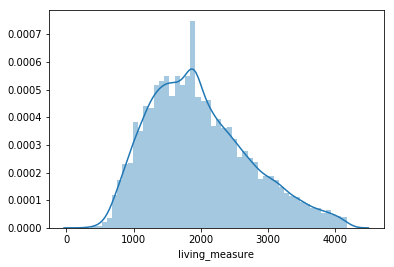

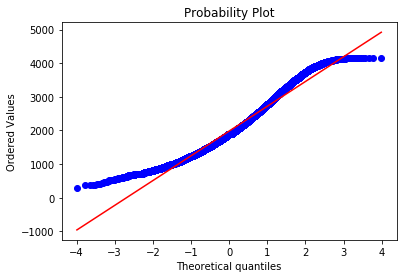

In [137]:
#lets pplot histogram and normal probability plot
sns.distplot(categorical_var_engineered['living_measure']);
fig = plt.figure()
res = stats.probplot(categorical_var_engineered['living_measure'], plot=plt)

In [138]:
def remove_skewness(df):
    df['living_measure']=np.sqrt(df['living_measure'])
    df['lot_measure']=np.sqrt(df['lot_measure'])
    df['living_measure15']=np.sqrt(df['living_measure15'])
    df['age_sold']=np.sqrt(df['age_sold'])
    #create column for new variable that has the value 1 if the area of Basement is greater than 0 else has the value 0
    #Signifies whether the house has a basement or not (1==yes, 0==no).
    df['newage']= 0
    df.loc[df.age_since_renovation > 0, "newage"] = 1
    # transform data
    df.loc[df.newage == 1,'age_since_renovation'] = np.sqrt(df.age_since_renovation)
    #for basement columns
    df['newbasement'] = 0
    df.loc[df.basement > 0, "newbasement"] = 1
    # transform data
    df.loc[df.newbasement == 1,'basement'] = np.sqrt(df.basement)
    df.drop(columns=['newbasement','newage'],inplace=True)
    return df

    

In [139]:
categorical_var_engineered_woskewness=remove_skewness(categorical_var_engineered)

C:\Users\cheta\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


In [140]:
numerical_cols

['living_measure',
 'lot_measure',
 'basement',
 'living_measure15',
 'lot_measure15',
 'age_sold',
 'age_since_renovation']

In [141]:
#lets check skewness of transformed data
for c in numerical_cols:
    print('Skewness of column {} is: {}'.format(c,skew(categorical_var_engineered_woskewness[c])))

Skewness of column living_measure is: 0.17751946536934407
Skewness of column lot_measure is: -0.28873186401704715
Skewness of column basement is: 0.7661010896205437
Skewness of column living_measure15 is: 0.3694468453072199
Skewness of column lot_measure15 is: 0.392668846781632
Skewness of column age_sold is: -0.24332587599065786
Skewness of column age_since_renovation is: 5.899965251049117


We can see that after doing sqrt transformation,we have reduced the skewness in the attributes.

# Scaling

We will be using robustscalar as it it robust to outliers

In [142]:
from sklearn.preprocessing import RobustScaler,StandardScaler

In [143]:
rb_scalar=RobustScaler(with_centering=False)

In [144]:
numerical_cols

['living_measure',
 'lot_measure',
 'basement',
 'living_measure15',
 'lot_measure15',
 'age_sold',
 'age_since_renovation']

In [145]:
categorical_var_engineered_woskewness.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'sight', 'basement', 'zipcode', 'living_measure15',
       'lot_measure15', 'age_sold', 'age_since_renovation', 'class',
       'major_cities'],
      dtype='object')

In [146]:
def scale_numerical_columns(df):
    num_cols=['living_measure', 'lot_measure','basement','living_measure15','lot_measure15', 'age_sold', 'age_since_renovation']
    #remaining_cols=['price','room_bed','room_bath','ceil','sight','zipcode','class','major_cities']
    #num_df=df[num_cols]
    #remaining_cols_df=df[remaining_cols]
    num_scaled=rb_scalar.fit_transform(df[num_cols])
    df[num_cols] =num_scaled
    return df
    

In [147]:
categorical_var_engineered_woskewness_scaled=scale_numerical_columns(categorical_var_engineered_woskewness)

In [149]:
categorical_var_engineered_woskewness_scaled.shape


(21045, 15)

In [195]:
categorical_var_engineered_woskewness_scaled.to_csv('attributes_engineered_woskewness_scaled.csv',encoding='utf-8',index=False)

In [196]:
categorical_var_engineered_woskewness_scaled.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  sight  \
0  808100         4       3.25        4.691567     4.801970   1.0      0   
1  277500         4       2.50        4.311065     3.584891   1.0      0   
2  404000         3       2.50        4.156125     2.722000   2.0      0   
3  300000         2       1.00        2.444677     2.566475   1.0      0   
4  699000         2       1.50        3.194321     2.634346   1.0      0   

   basement  zipcode  living_measure15  lot_measure15  age_sold  \
0  0.000000    98133          4.962340       1.998148  2.074140   
1  1.195229    98023          5.123572       2.328042  1.686901   
2  0.000000    98038          5.246779       1.150265  0.823095   
3  0.000000    98133          4.201849       1.016931  2.681698   
4  0.000000    98115          4.697810       1.571429  2.116552   

   age_since_renovation class  major_cities  
0                   0.0     A       Seattle  
1                   0.0     B   Federal Way  
2                   0.0     B  Maple Valley  
3                   0.0     B       Seattle  
4                   0.0     B       Seattle

Just do encoding of categorical variables and run the model on top of it

Numerical Columns are:
'living_measure','lot_measure','basement','living_measure15','lot_measure15', 'age_sold', 'age_since_renovation'

Categorical Columns are:
'ceil','sight','class','major_cities'

I have retained both zipcode and major_cities. We will be using major_cities column only. Drop one of them as an when required

Columns still of confusion to be treated as categorical or numerical vairables:
'room_bed','room_bath'

